                                        Project Discription
    
The aim of the project is to employ several supervised algorithms to accurately model individuals' income, whether he makes more than 50,000 or not, using data collected from the 1994 U.S. Census.

The dataset that will be used is the Census income dataset, which was extracted from the machine learning repository (UCI), which contains about 32561 rows and 15 features.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [2]:
cidf=pd.read_csv('Census_Income.csv')

In [3]:
cidf

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#Checking for number of tuples and number of Feature
cidf.shape

(32560, 15)

In [5]:
cidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
cidf.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
cidf.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [ ]:
# Here from the above info that missing values are not present in the dataset

In [8]:
#checking for unique value in each feature 
cidf.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
cidf.Workclass.value_counts()



Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [10]:
cidf.Occupation.value_counts()

Occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3769
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [11]:
cidf.Native_country.value_counts()

Native_country
United-States                 29169
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [12]:
change_column=['Workclass','Occupation','Native_country']
for col in change_column:
    cidf[col]=cidf[col].replace({'?':'unknown'})

In [13]:
for i in cidf:
    print(cidf[i].value_counts())

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64
Education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [ ]:
# now from the above observation we checked that ? marks has been replaced with unknown 

In [14]:
cidf.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [ ]:
#checking for duplicate value

In [15]:
cidf.duplicated().sum()

24

In [ ]:
# Here  we have seen that duplicates value are present 

In [16]:
cidf.drop_duplicates(inplace=True)

In [17]:
cidf.duplicated().sum()

0

In [47]:
cidf

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [18]:
# Removing unwanted space from the feature 
for col in cidf:
    if cidf[col].dtypes=='object':
        
        cidf[col]=cidf[col].str.strip()

In [20]:
cidf

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:

n_greater50=cidf[cidf['Income'] == '>50K'].shape[0]

In [20]:
n_less50=cidf[cidf['Income'] == '<=50K'].shape[0]

In [21]:
n_less50


24697

In [22]:
percent_makes50K=(n_greater50/(cidf.shape[0]))*100
print('Total percentage of individual makes over 50k are:',percent_makes50K)

Total percentage of individual makes over 50k are: 24.093312023604625


In [23]:
percent_less50K=(n_less50/(cidf.shape[0]))*100
print('Total percentage of individual makes less than 50k are:',percent_less50K)

Total percentage of individual makes less than 50k are: 75.90668797639538


In [ ]:
# Here from the above output we observed that only 24.09% of individual makes less than $50k

In [24]:
cidf.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


                                EXPLORATORY DATA ANALYSIS

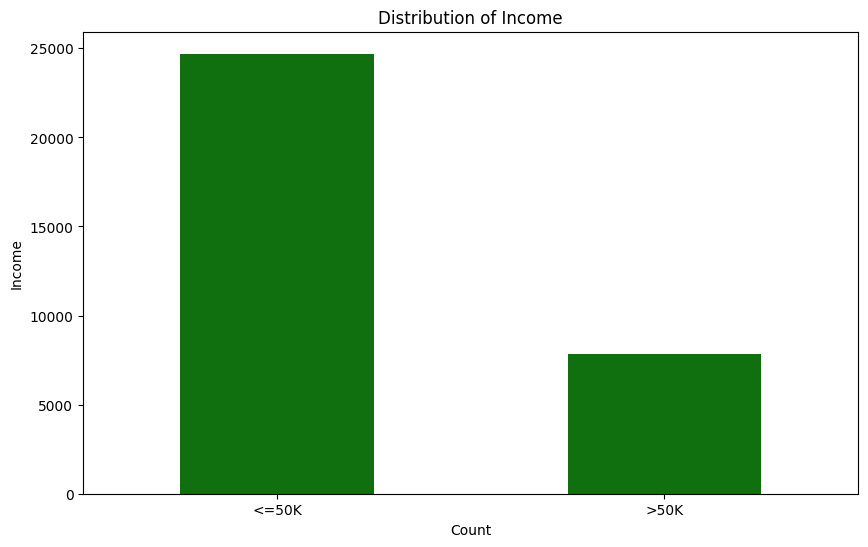

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Income', data=cidf, color='green',width=0.5)
plt.xlabel('Count')
plt.ylabel('Income')
plt.title('Distribution of Income')
plt.show()


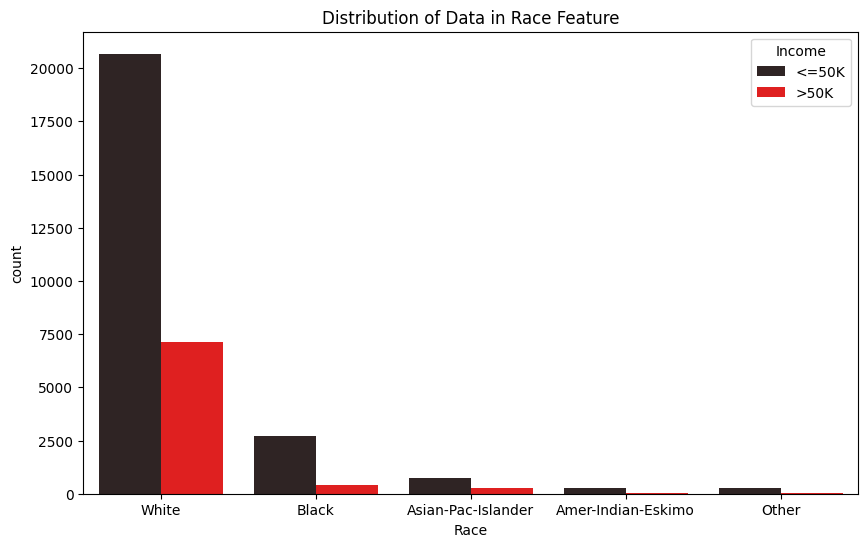

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='Income', data=cidf, color='red')
plt.xlabel('Race')
plt.ylabel('count')
plt.title('Distribution of Data in Race Feature')
plt.show()


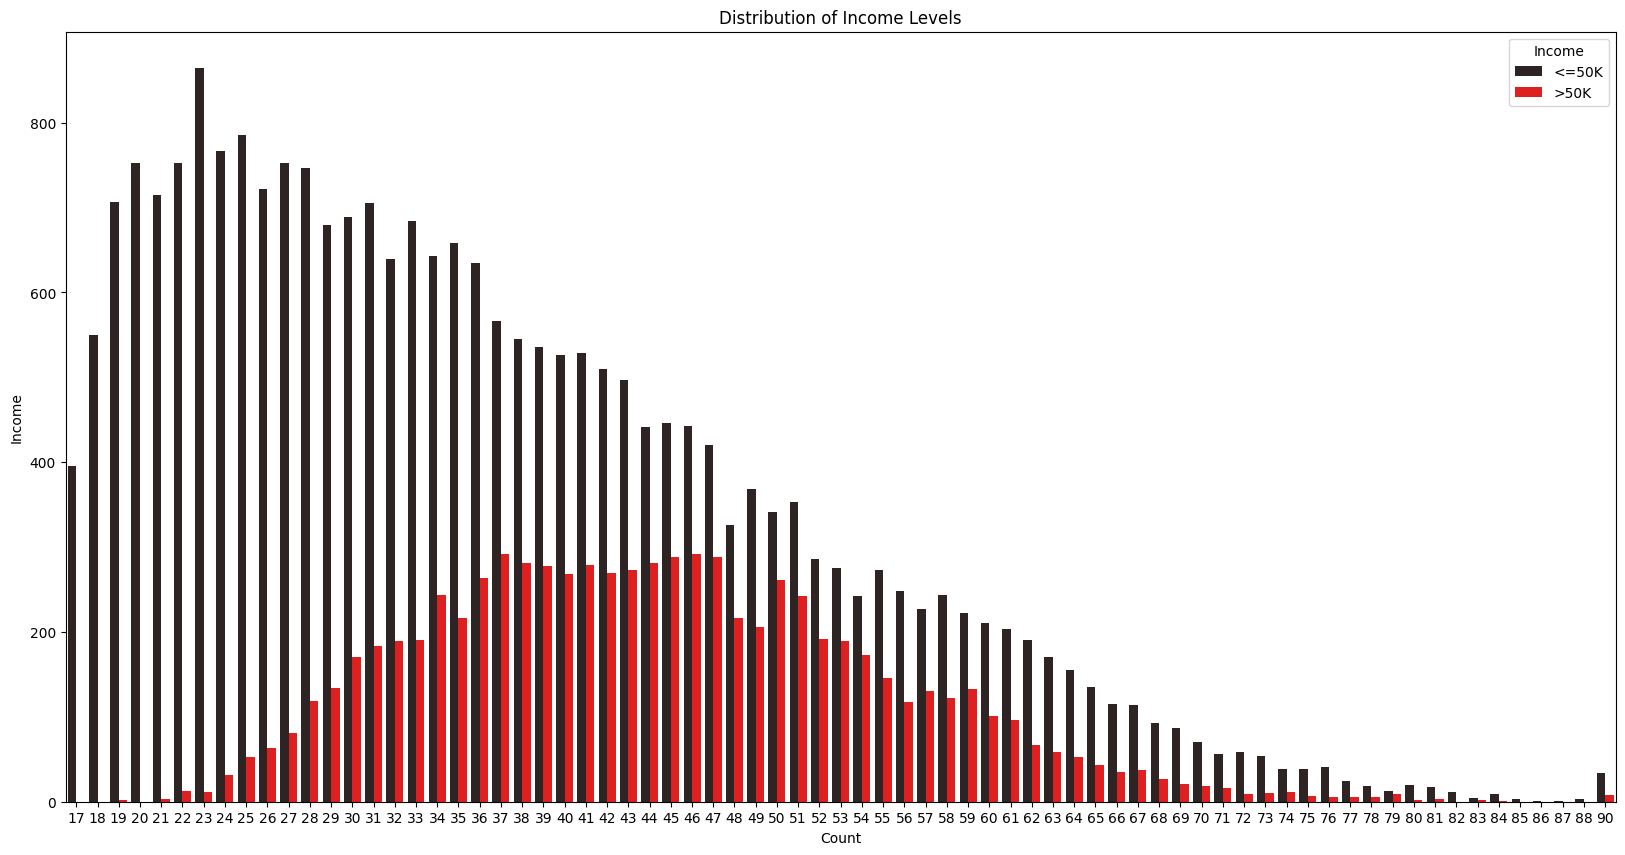

In [61]:

plt.figure(figsize=(20,10))
sns.countplot(x=cidf['Age'],data=cidf, hue='Income',color='red')
plt.xlabel('Count')
plt.ylabel('Income')
plt.title('Distribution of Income Levels')
plt.show()


In [ ]:
# From the above plot we conclude that the number of individual who makes less than $50k are more in mumber with age 23
#The number of individual who makes greater  than $50k are more in mumber with age between 37-47 years.

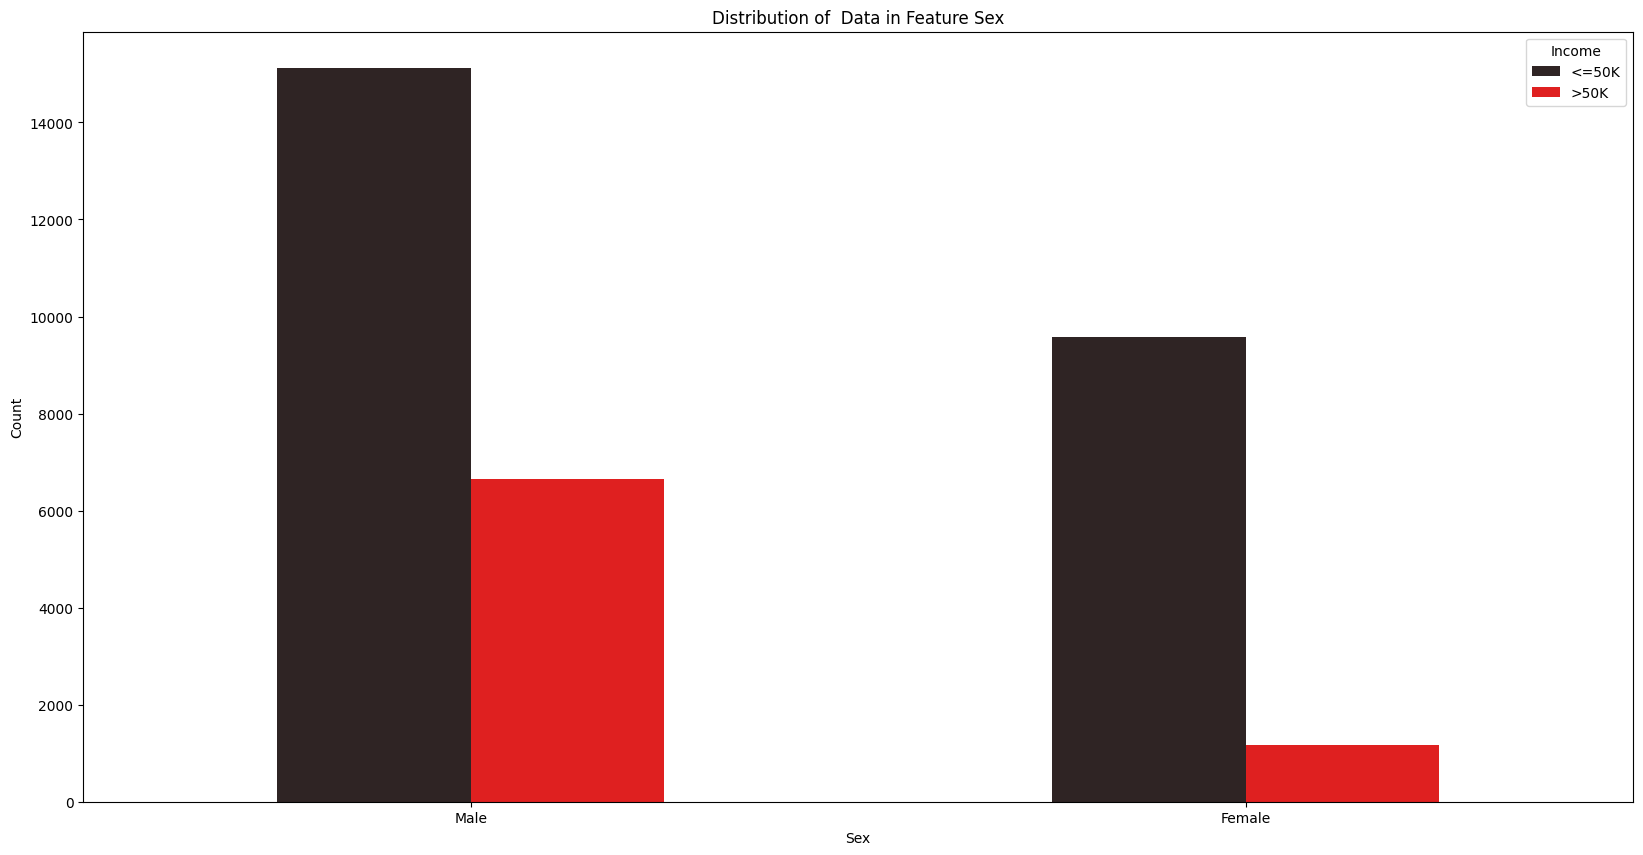

In [77]:

plt.figure(figsize=(20,10))
sns.countplot(x=cidf['Sex'],data=cidf, hue='Income',color='red',width=0.5)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of  Data in Feature Sex')
plt.show()


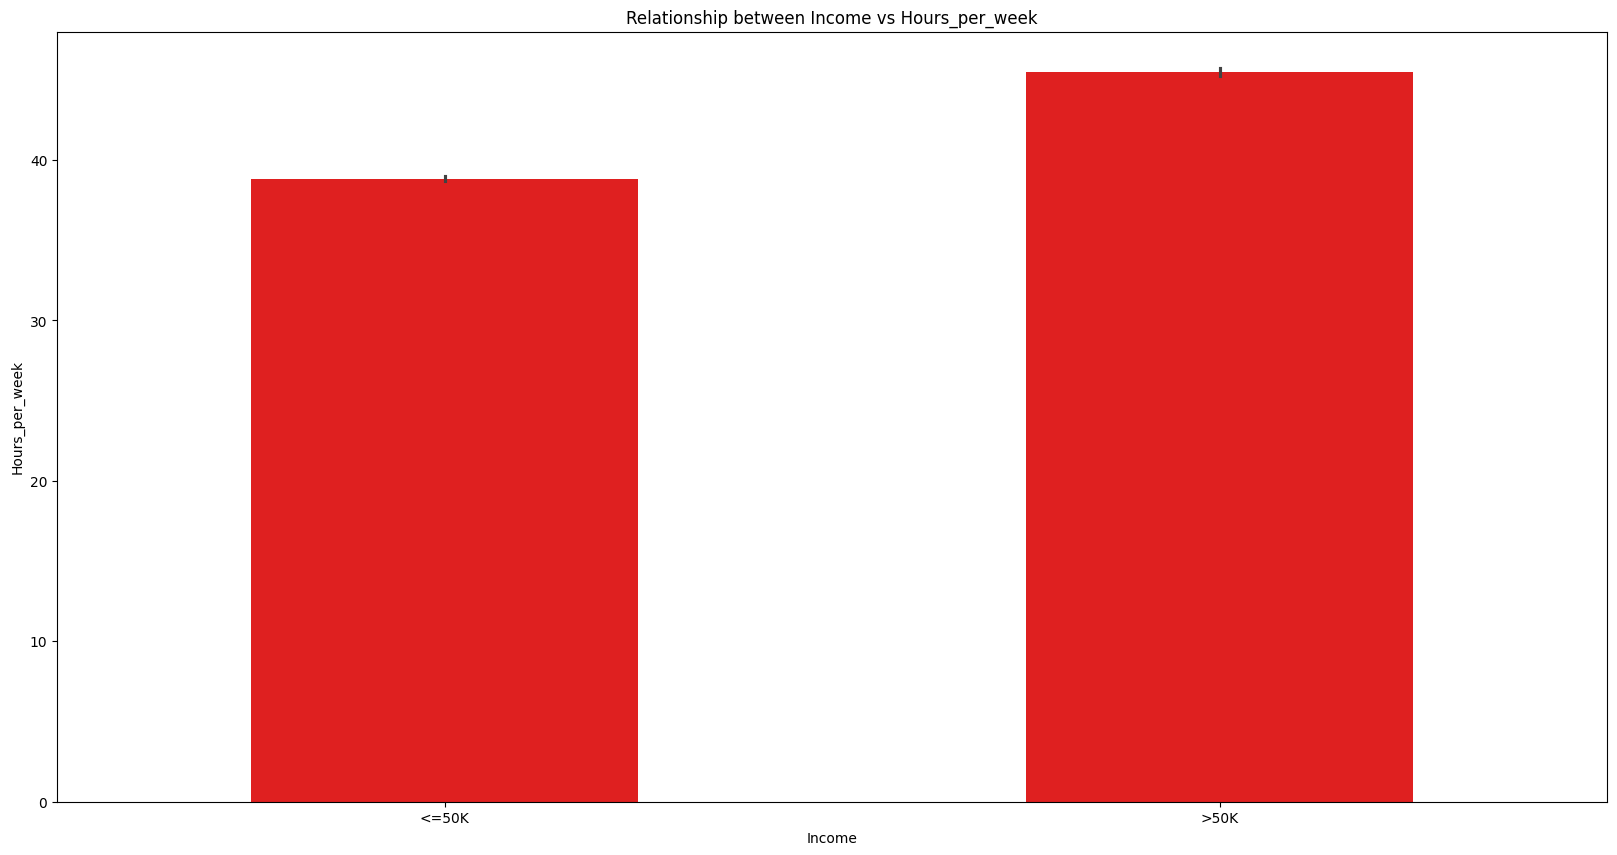

In [79]:

plt.figure(figsize=(20, 10))
sns.barplot(x=cidf['Income'], y=cidf['Hours_per_week'], color='red',width=0.5)
plt.xlabel('Income')
plt.ylabel('Hours_per_week')
plt.title('Relationship between Income vs Hours_per_week')
plt.show()


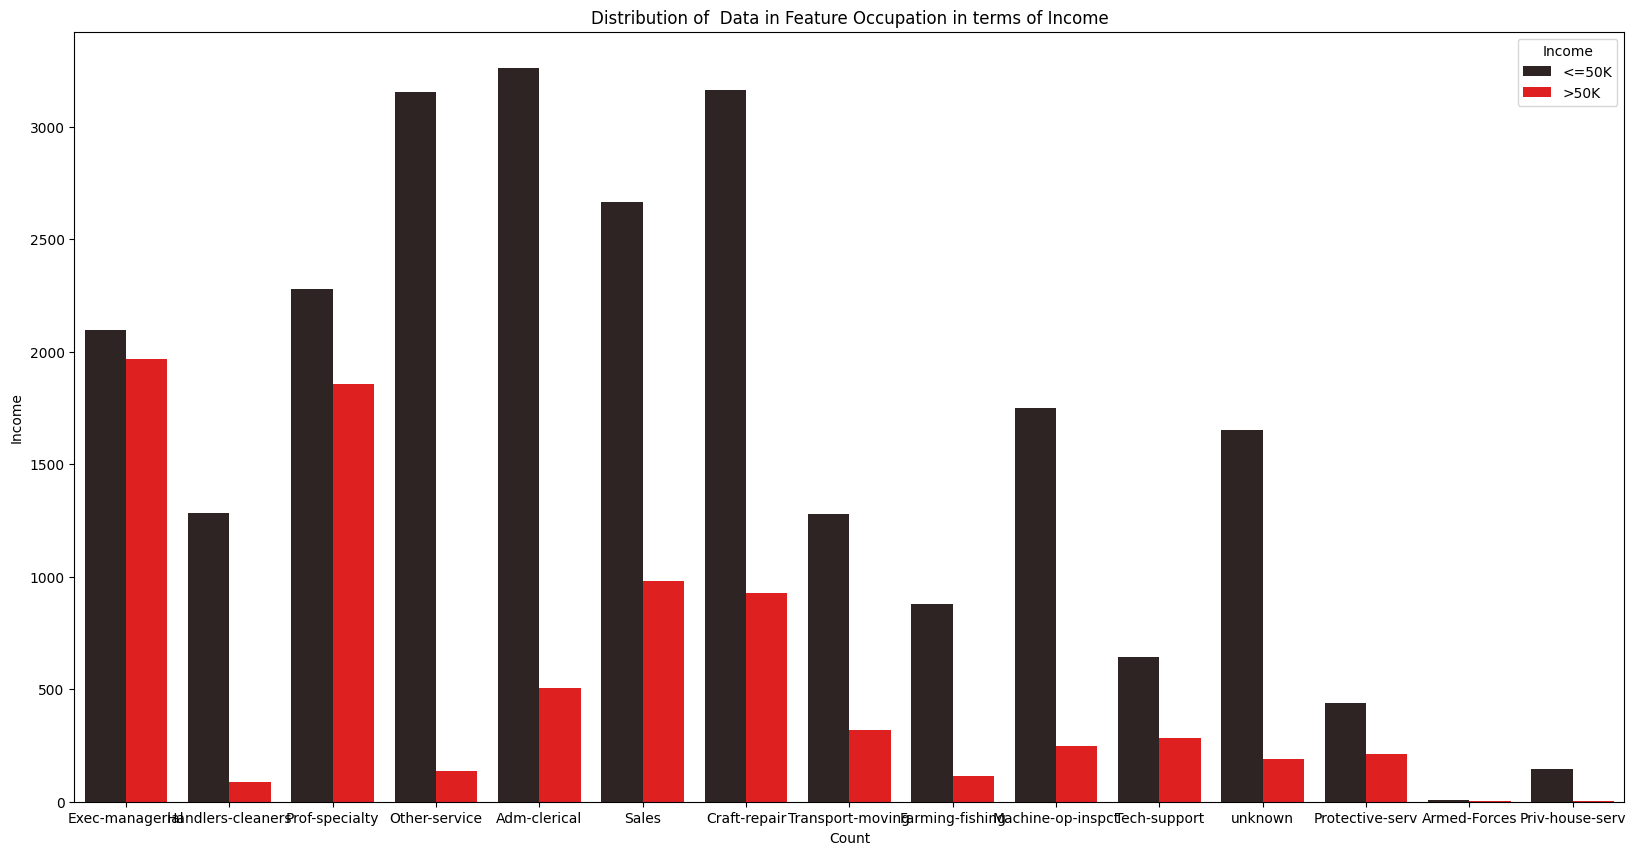

In [66]:

plt.figure(figsize=(20,10))
sns.countplot(x=cidf['Occupation'],data=cidf, hue='Income',color='red')
plt.xlabel('Count')
plt.ylabel('Income')
plt.title('Distribution of  Data in Feature Occupation in terms of Income')
plt.show()


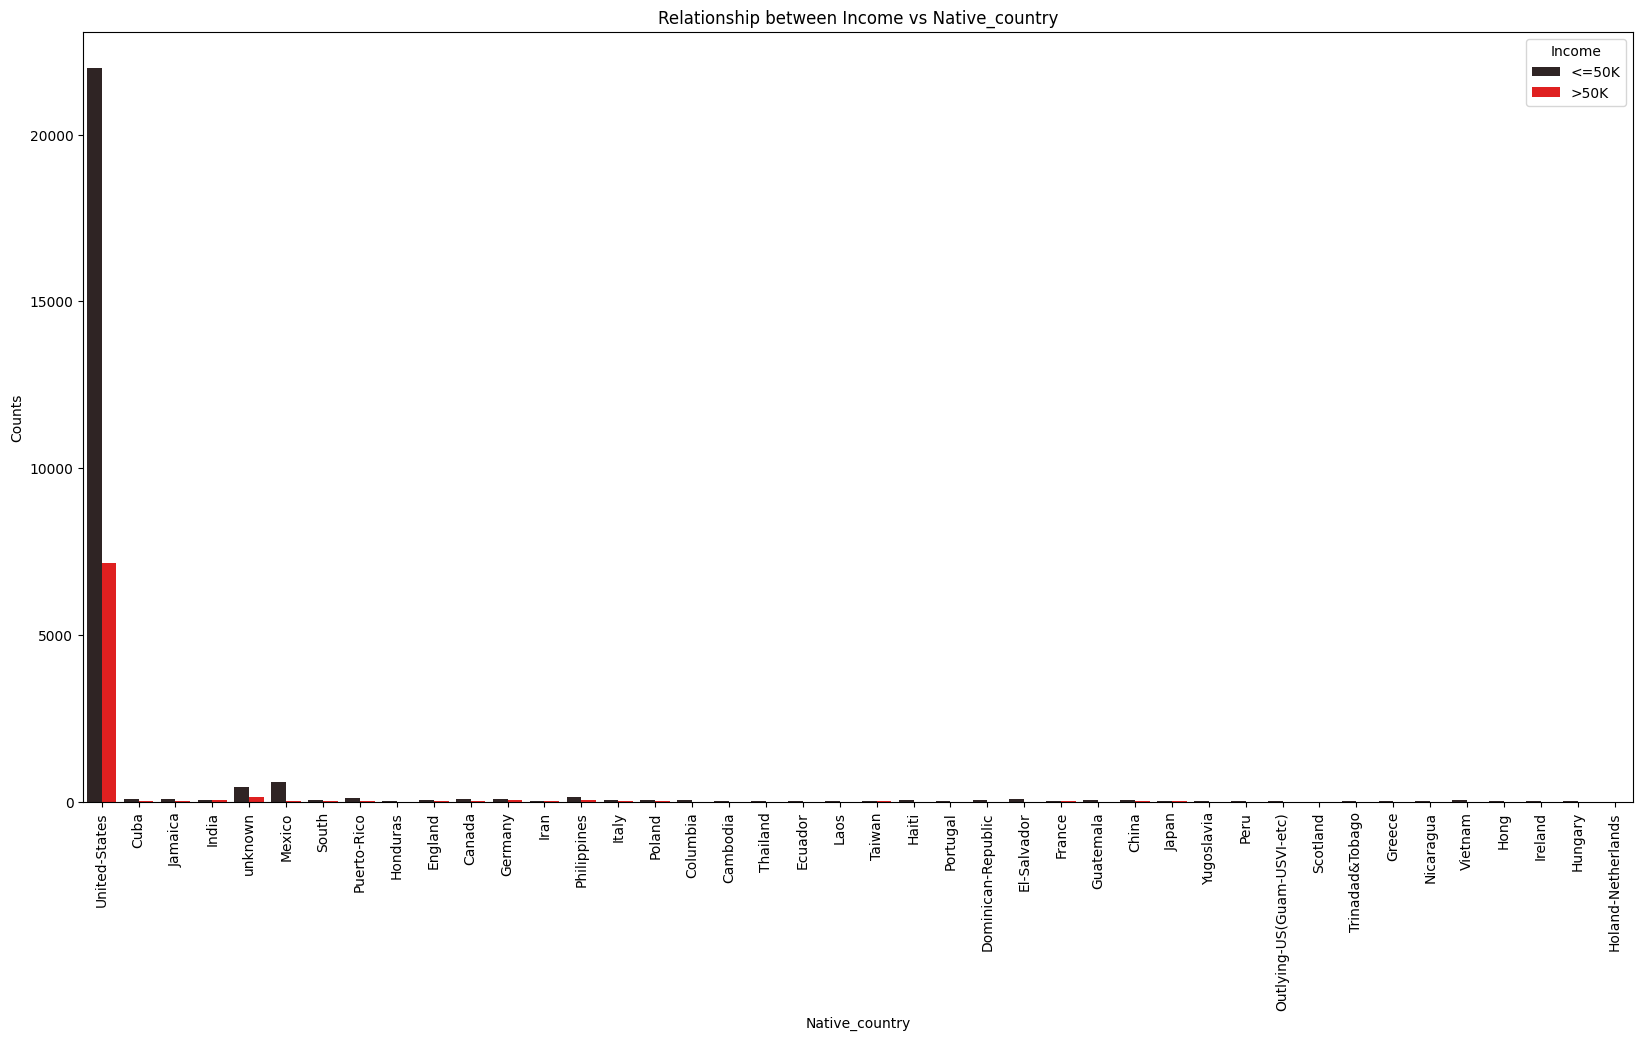

In [72]:

plt.figure(figsize=(20, 10))
sns.countplot(x='Native_country',data=cidf,hue='Income'  ,color='red')
plt.xlabel('Native_country')
plt.ylabel('Counts')
plt.title('Relationship between Income vs Native_country')
plt.xticks(rotation=90
          )
plt.show()


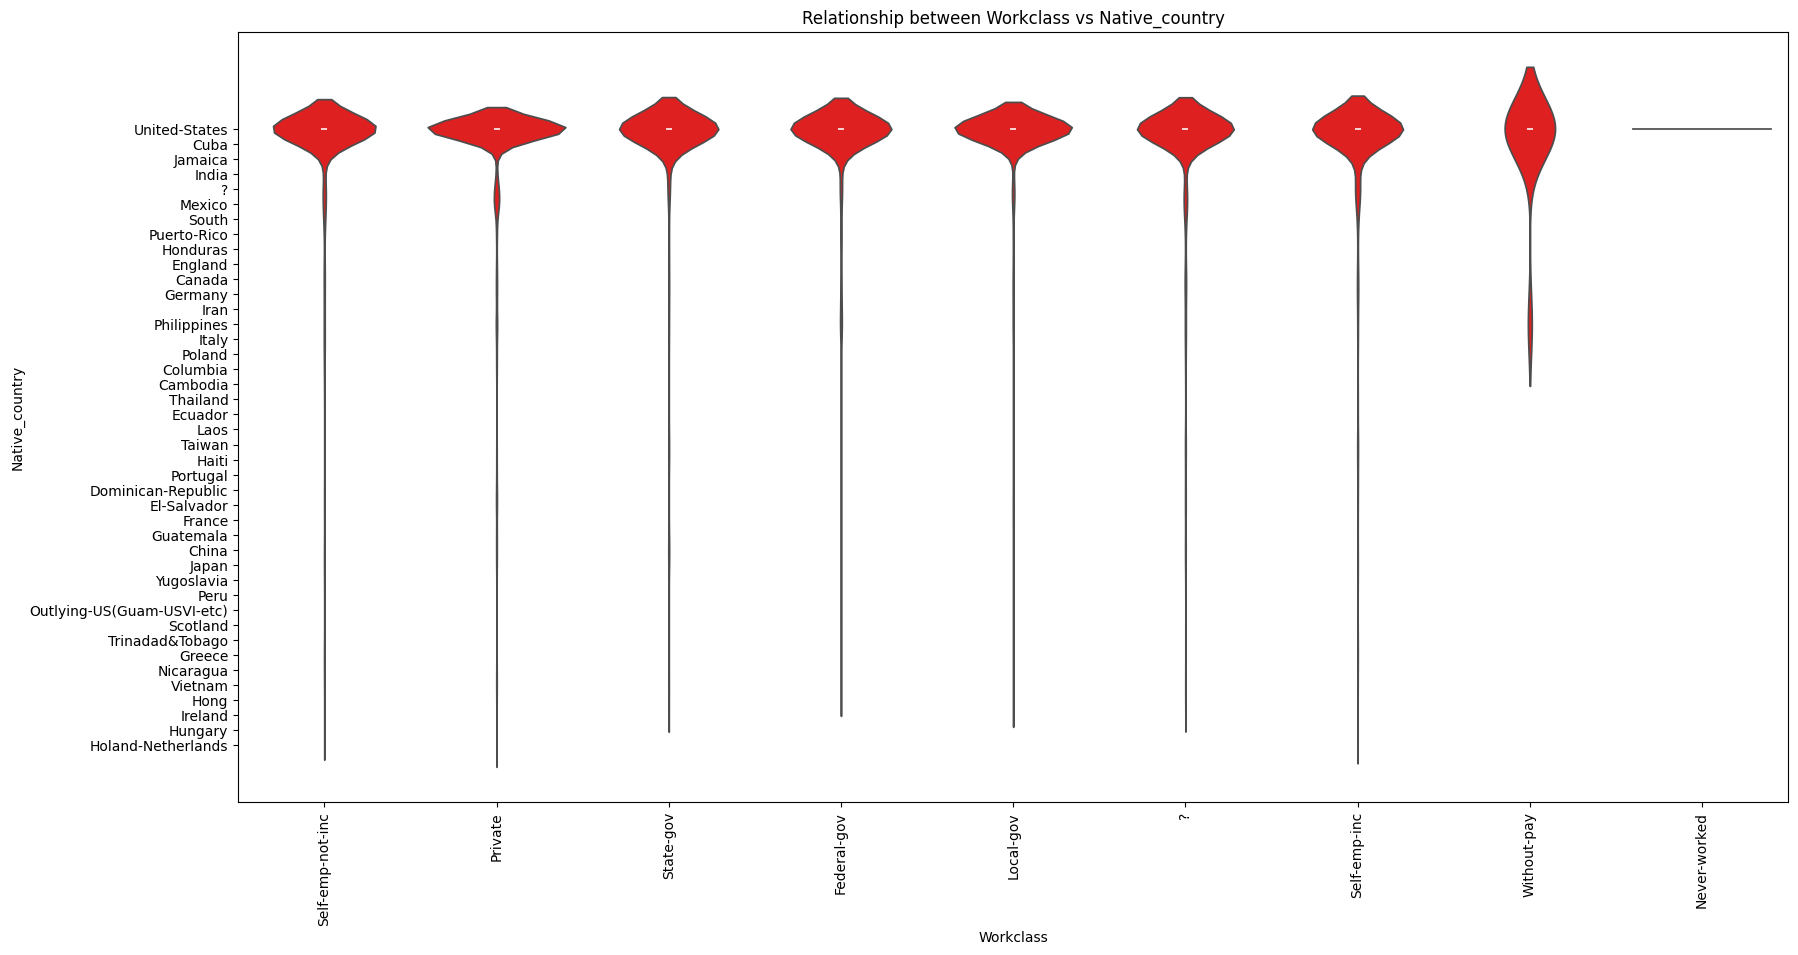

In [36]:

plt.figure(figsize=(20, 10))
sns.violinplot(x=cidf['Workclass'],y=cidf['Native_country'] ,color='red')
plt.xlabel('Workclass')
plt.ylabel('Native_country')
plt.title('Relationship between Workclass vs Native_country')
plt.xticks(rotation=90
          )
plt.show()


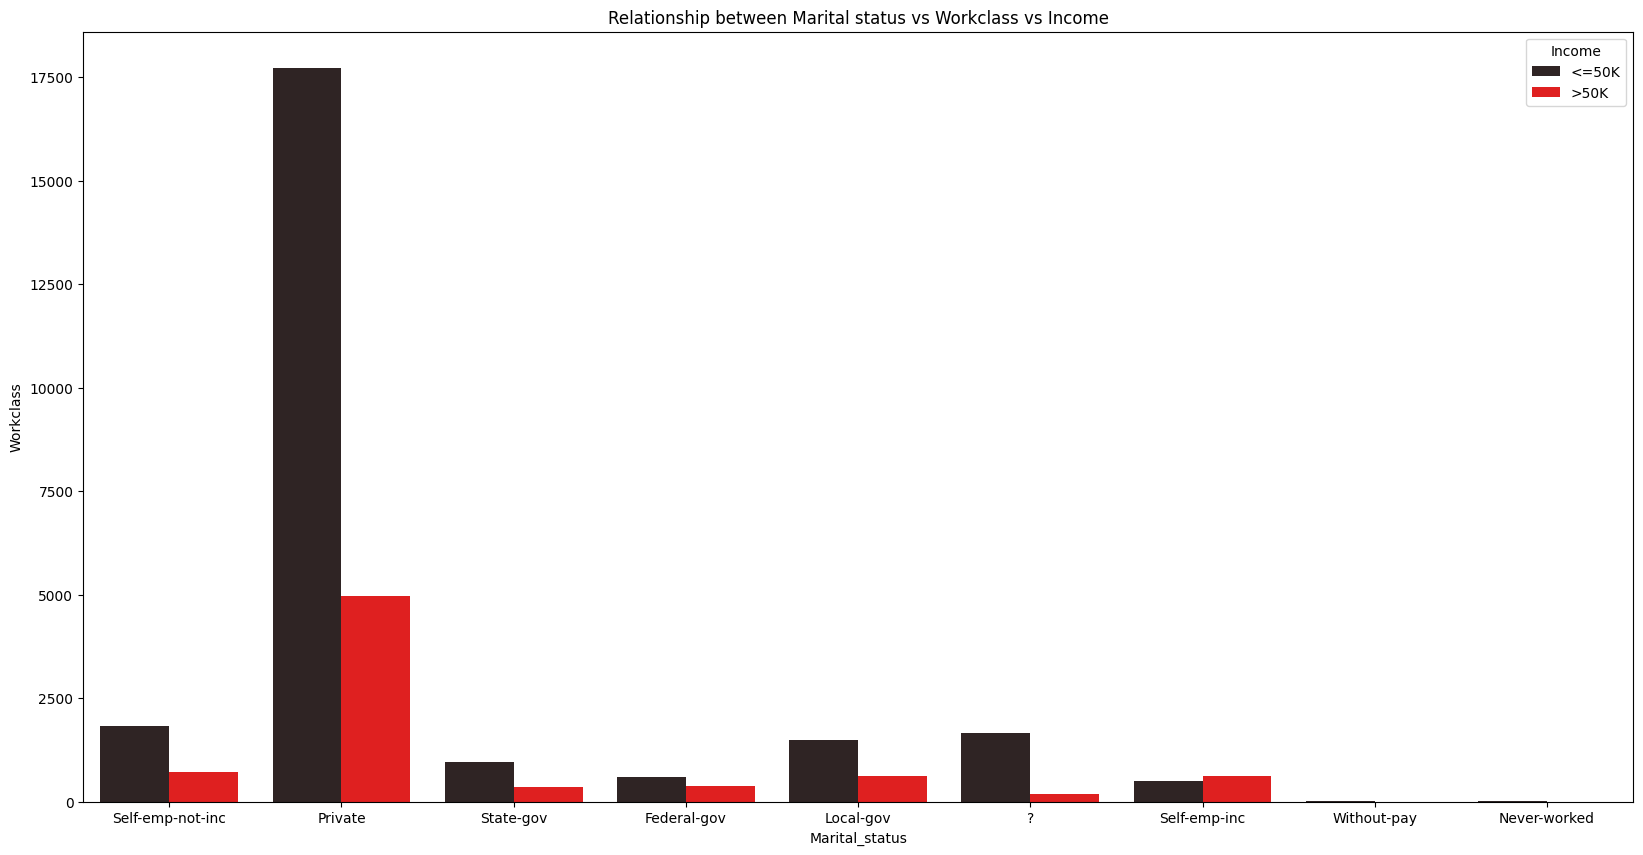

In [27]:

plt.figure(figsize=(20, 10))
sns.countplot(x=cidf['Workclass'],hue=cidf['Income'] , color='red')
plt.xlabel('Marital_status')
plt.ylabel('Workclass')
plt.title('Relationship between Marital status vs Workclass vs Income')
#plt.xticks(rotation=90)
plt.show()


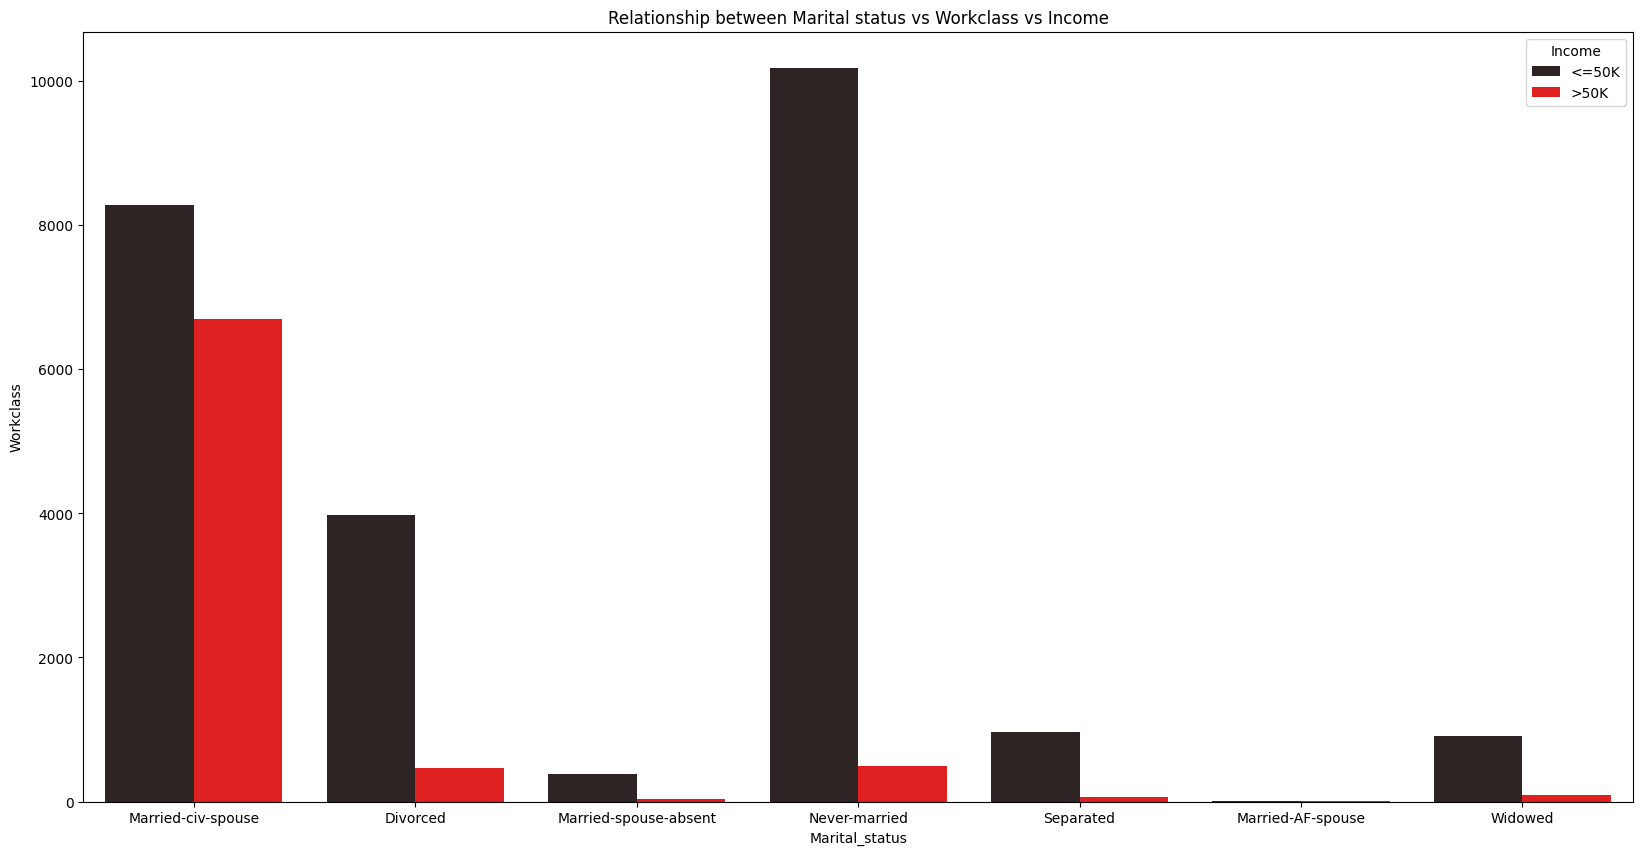

In [75]:

plt.figure(figsize=(20, 10))
sns.countplot(x=cidf['Marital_status'],hue=cidf['Income'] , color='red')
plt.xlabel('Marital_status')
plt.ylabel('Workclass')
plt.title('Relationship between Marital status vs Workclass vs Income')
#plt.xticks(rotation=90)
plt.show()


In [ ]:
#For <$50k Income per year : maximum  number of individuals have Never married as their Marital Status
#For >$50k Income per year : maximum  number of individuals have Married-civ-spouse as their Marital Status

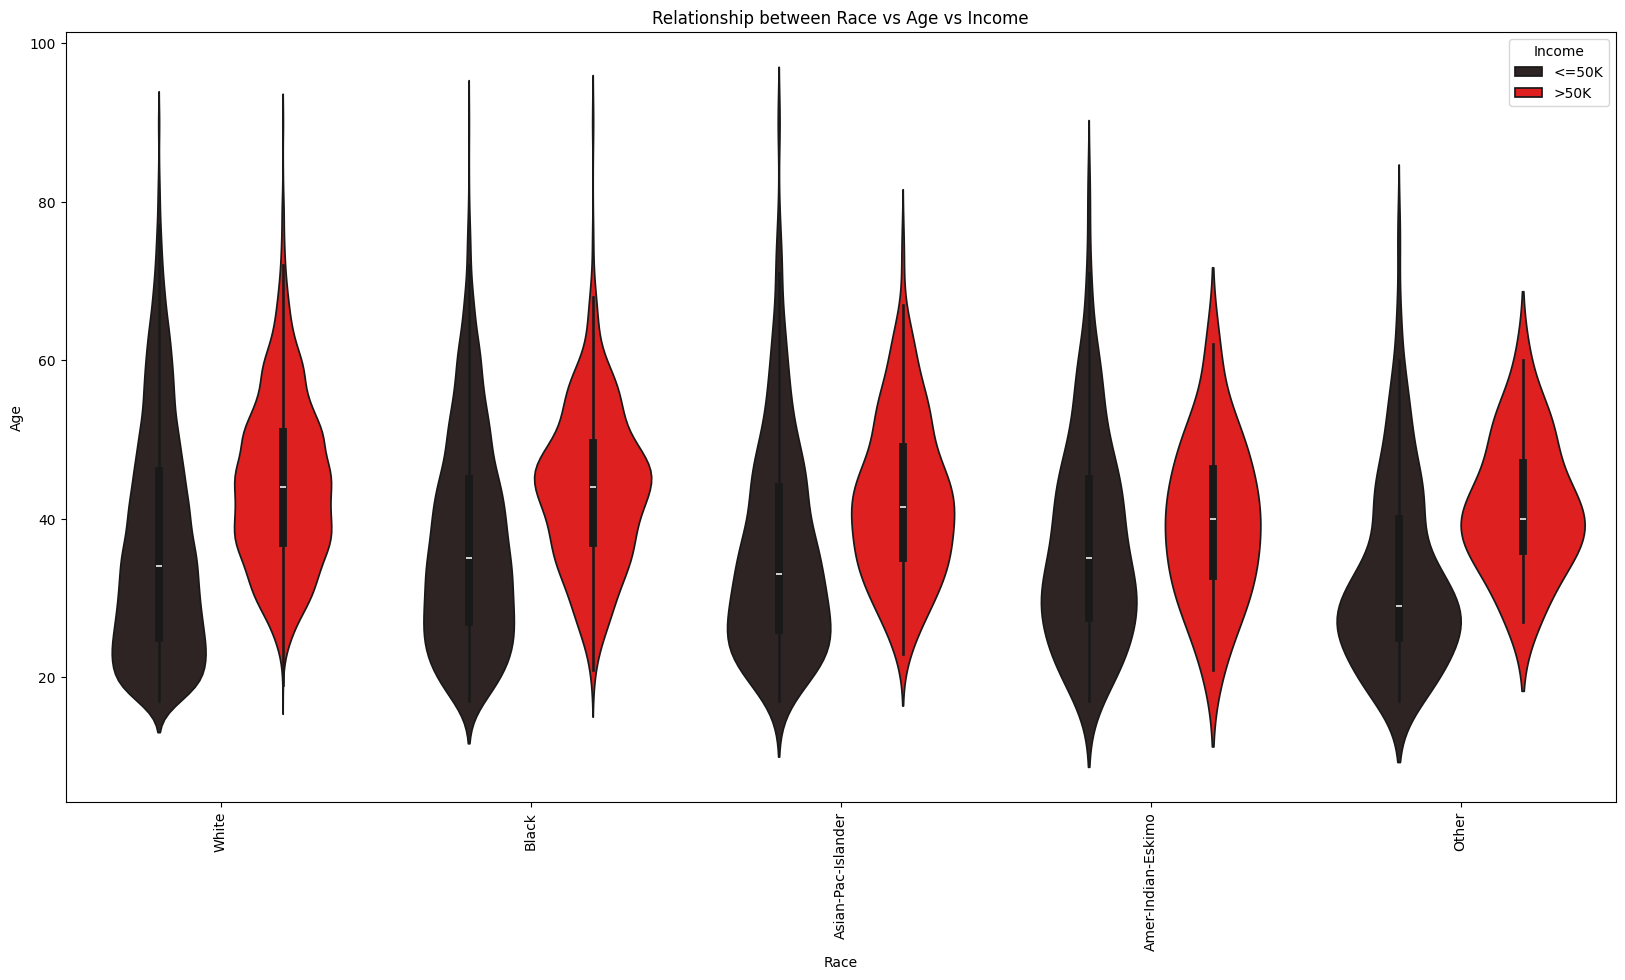

In [80]:

plt.figure(figsize=(20, 10))
sns.violinplot(x=cidf['Race'],y=cidf['Age'] ,hue=cidf['Income'],color='red')
plt.xlabel('Race')
plt.ylabel('Age')
plt.title('Relationship between Race vs Age vs Income')
plt.xticks(rotation=90
          )
plt.show()


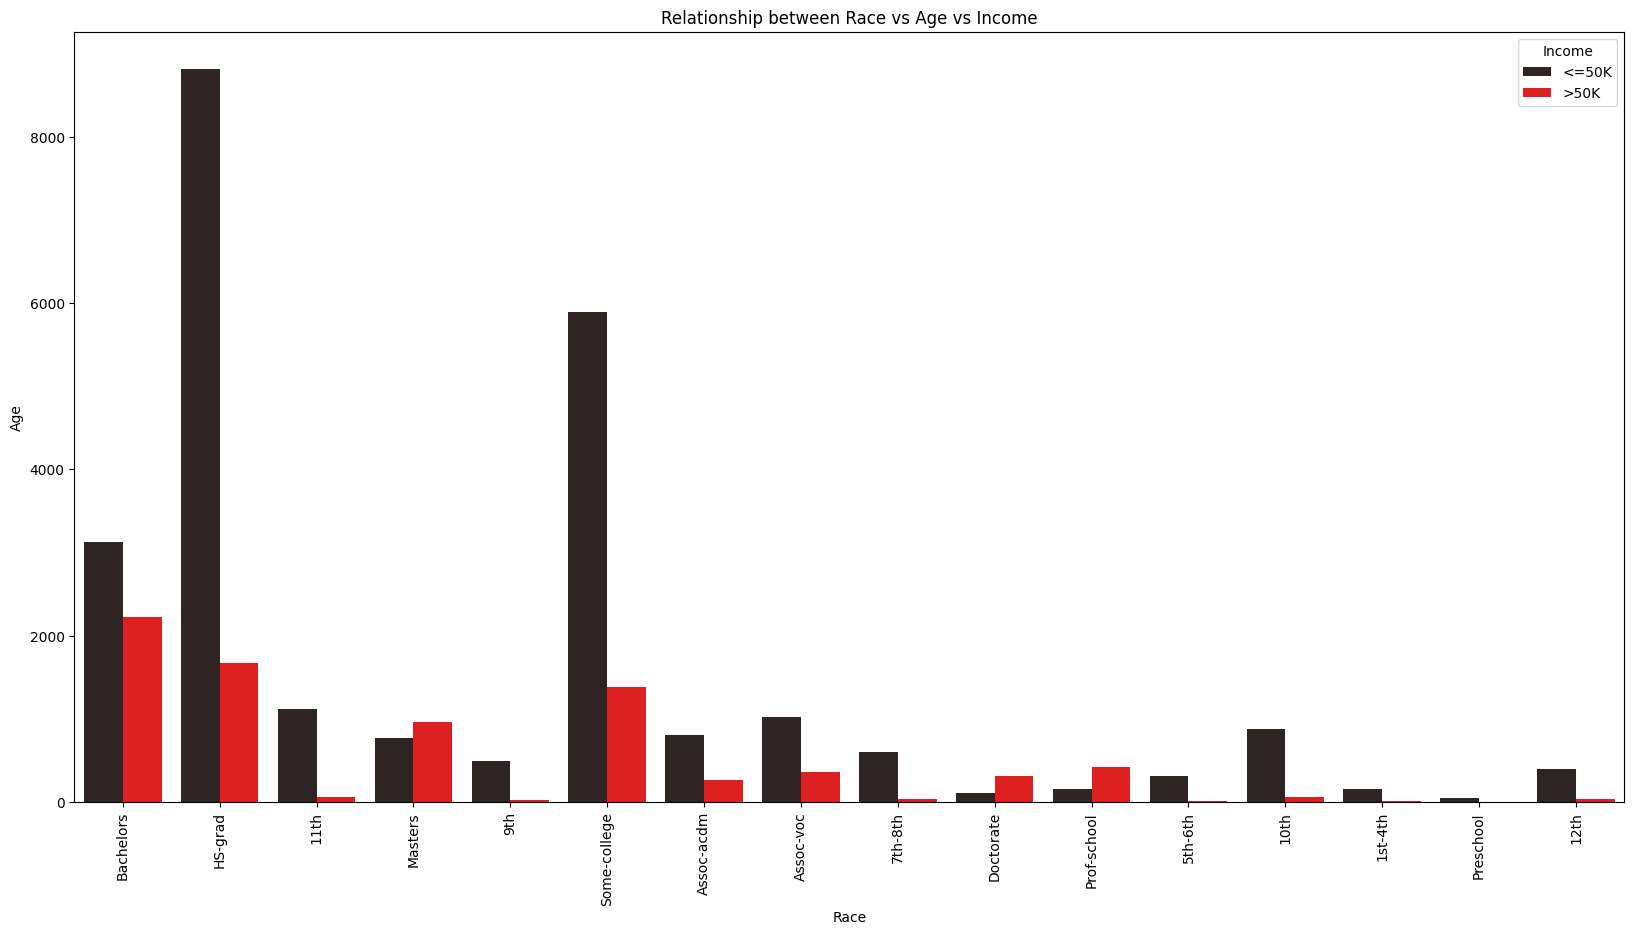

In [30]:

plt.figure(figsize=(20, 10))
sns.countplot(x=cidf['Education'],hue=cidf['Income'],color='red')
plt.xlabel('Race')
plt.ylabel('Age')
plt.title('Relationship between Race vs Age vs Income')
plt.xticks(rotation=90
          )
plt.show()


In [ ]:
# Here from above countplot() observation we conclude that most of the  individual who makes income greater than $50k having Bachelors degree as their Education
# Count of individual who makes income less than $50k per year have their degree is HS-grad are more as compared to education level

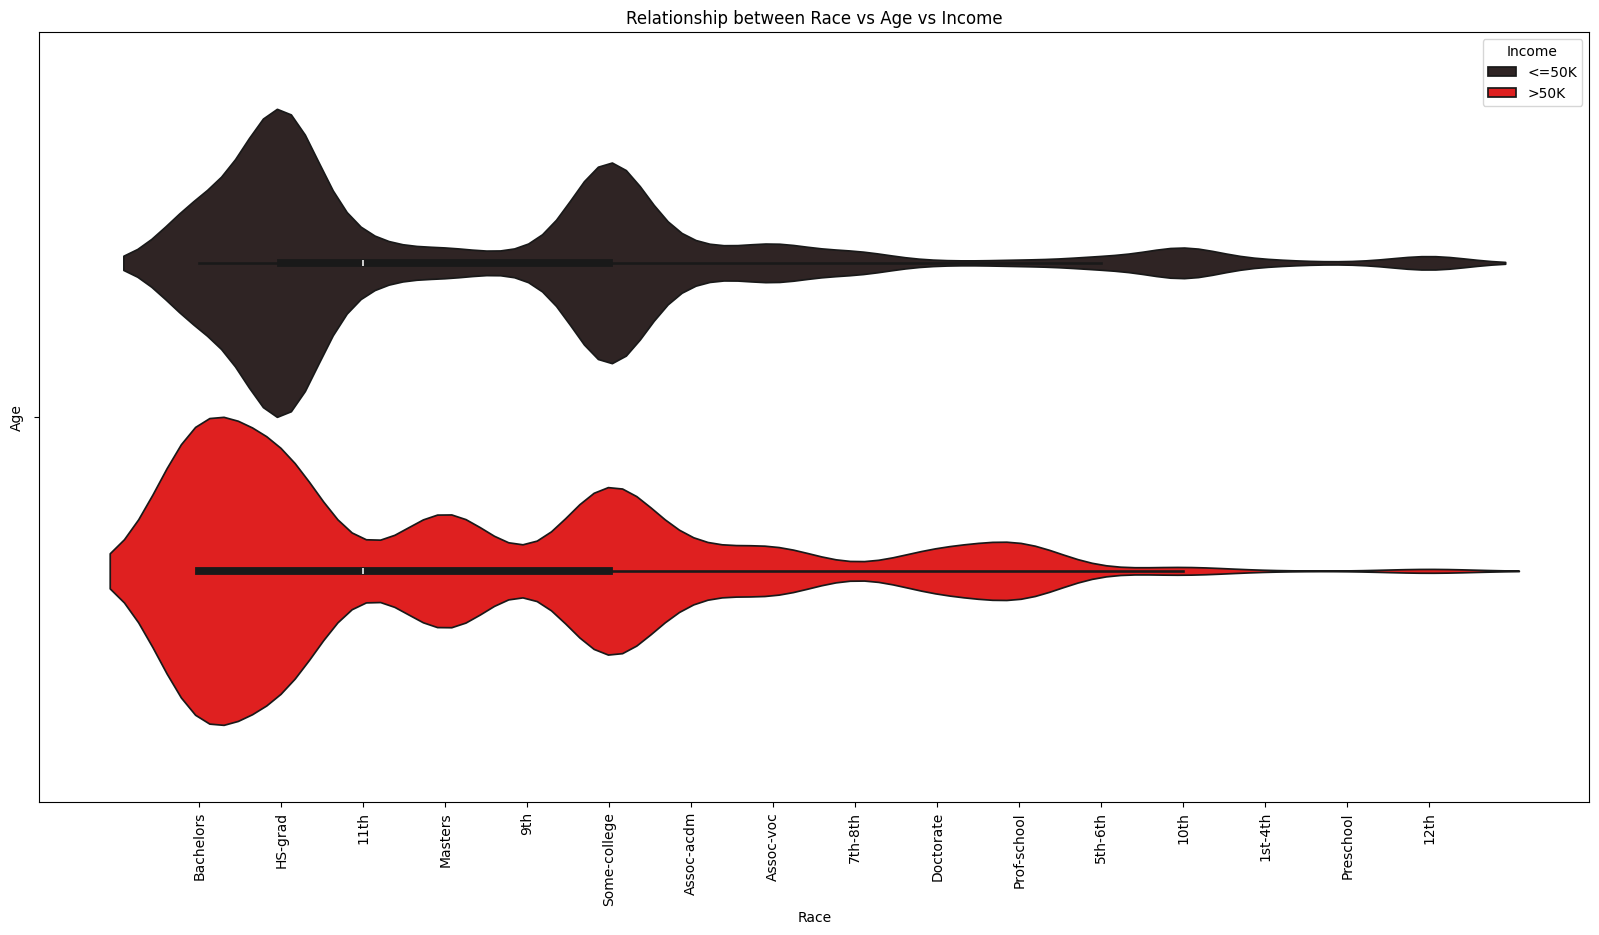

In [31]:

plt.figure(figsize=(20, 10))
sns.violinplot(x=cidf['Education'],hue=cidf['Income'],color='red')
plt.xlabel('Race')
plt.ylabel('Age')
plt.title('Relationship between Race vs Age vs Income')
plt.xticks(rotation=90
          )
plt.show()


In [ ]:
# from the violinplot() also we get the same insights.
# Here from above countplot() observation we conclude that most of the  individual who makes income greater than $50k having Bachelors degree as their Education
# Count of individual who makes income less than $50k per year have their degree is HS-grad are more as compared to education level

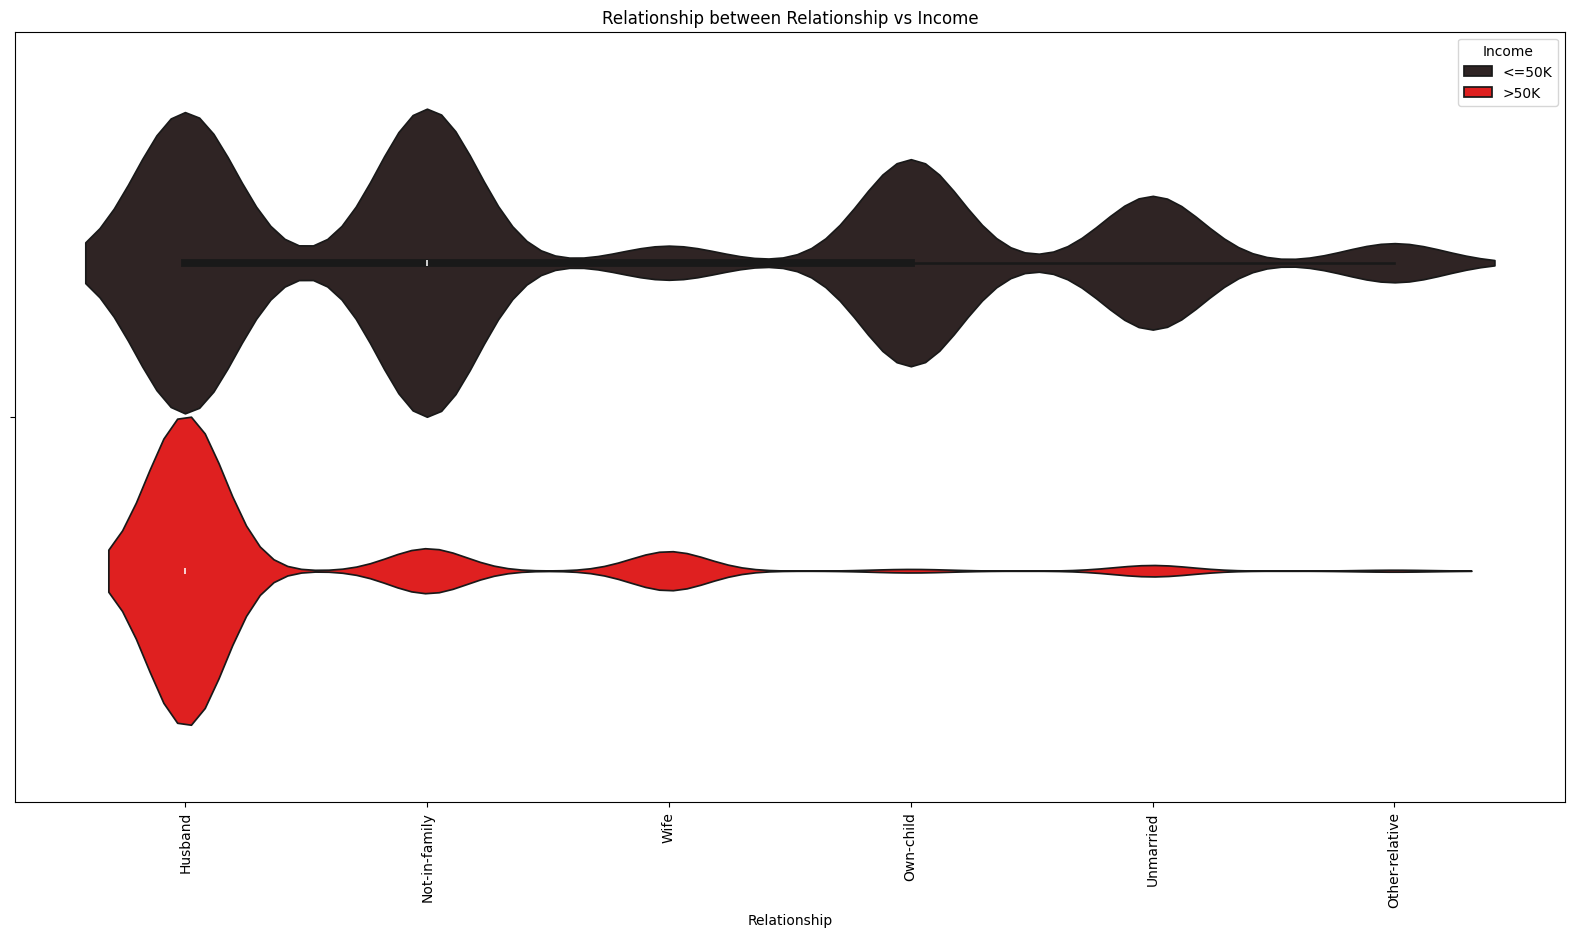

In [38]:

plt.figure(figsize=(20, 10))
sns.violinplot(x=cidf['Relationship'],hue=cidf['Income'],color='red')
plt.xlabel('Relationship')

plt.title('Relationship between Relationship vs Income')
plt.xticks(rotation=90
          )
plt.show()


In [ ]:
# The maximum count of the individual who makes income greater than $50k are mostly a husband in relation as compared to other relation
# The maximum count of the individual who makes income less  than $50k are mostly a husband and Not-in-family  in relation as compared to other relationship


                            #ENCODING CATEGORICAL FEATURE 

In [25]:
# separating numerical feature and categorical feature
categorical=[]
numerical=[]
for col in cidf:
    if cidf[col].dtypes=='object':
        categorical.append(col)
    else:
        numerical.append(col)

In [31]:
categorical

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [33]:
numerical

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [ ]:
# we observed in these two feature that maximum value are same so there will be no variance in the feature so we need to drop it 
cidf.drop(['Capital_gain','Capital_loss'],axis=1,inplace=True)

In [ ]:
# We observed in the dataframe we have two same feature Education and encoded ordinal form is Education_num so we need to drop one of them
cidf.drop(['Education'],axis=1,inplace=True)

In [37]:
del categorical[1]

In [38]:
le=LabelEncoder()
for col in categorical:
    cidf[col]=le.fit_transform(cidf[col])
    

In [56]:
cidf

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,13,2,3,0,4,1,13,38,0
1,38,3,215646,9,0,5,1,4,1,40,38,0
2,53,3,234721,7,2,5,0,2,1,40,38,0
3,28,3,338409,13,2,9,5,2,0,40,4,0
4,37,3,284582,14,2,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,12,2,12,5,4,0,38,38,0
32556,40,3,154374,9,2,6,0,4,1,40,38,1
32557,58,3,151910,9,6,0,4,4,0,40,38,0
32558,22,3,201490,9,4,0,3,4,1,20,38,0


In [89]:
cidf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32536 non-null  int64
 1   Workclass       32536 non-null  int64
 2   Fnlwgt          32536 non-null  int64
 3   Education_num   32536 non-null  int64
 4   Marital_status  32536 non-null  int32
 5   Occupation      32536 non-null  int32
 6   Relationship    32536 non-null  int32
 7   Race            32536 non-null  int32
 8   Sex             32536 non-null  int32
 9   Capital_gain    32536 non-null  int64
 10  Capital_loss    32536 non-null  int64
 11  Hours_per_week  32536 non-null  int64
 12  Native_country  32536 non-null  int32
 13  Income          32536 non-null  int32
dtypes: int32(7), int64(7)
memory usage: 2.9 MB


In [39]:
correlation=cidf.corr()

In [40]:
correlation['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335299
Age               0.234039
Hours_per_week    0.229659
Sex               0.215984
Occupation        0.075398
Race              0.071855
Workclass         0.051706
Native_country    0.015623
Fnlwgt           -0.009521
Marital_status   -0.199187
Relationship     -0.250955
Name: Income, dtype: float64

<Axes: >

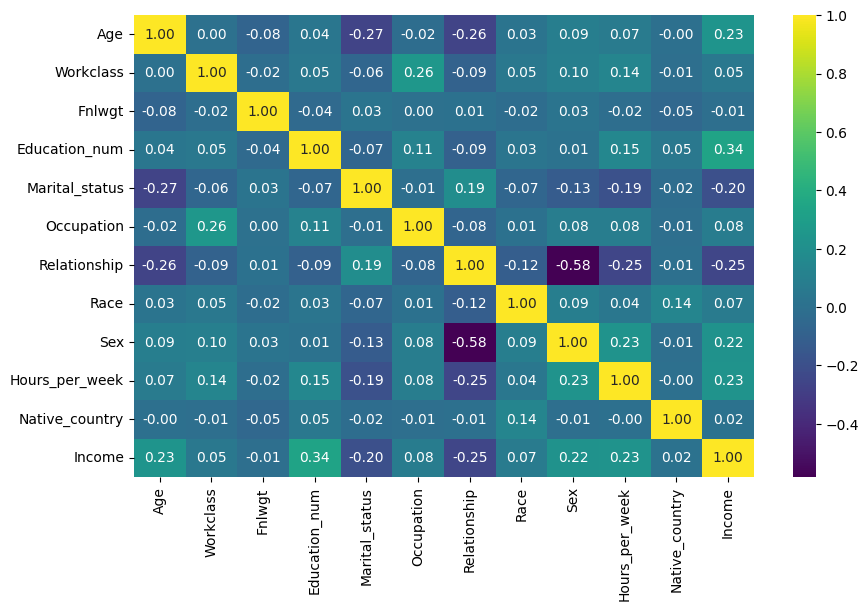

In [41]:
plt.figure(figsize=[10,6])
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

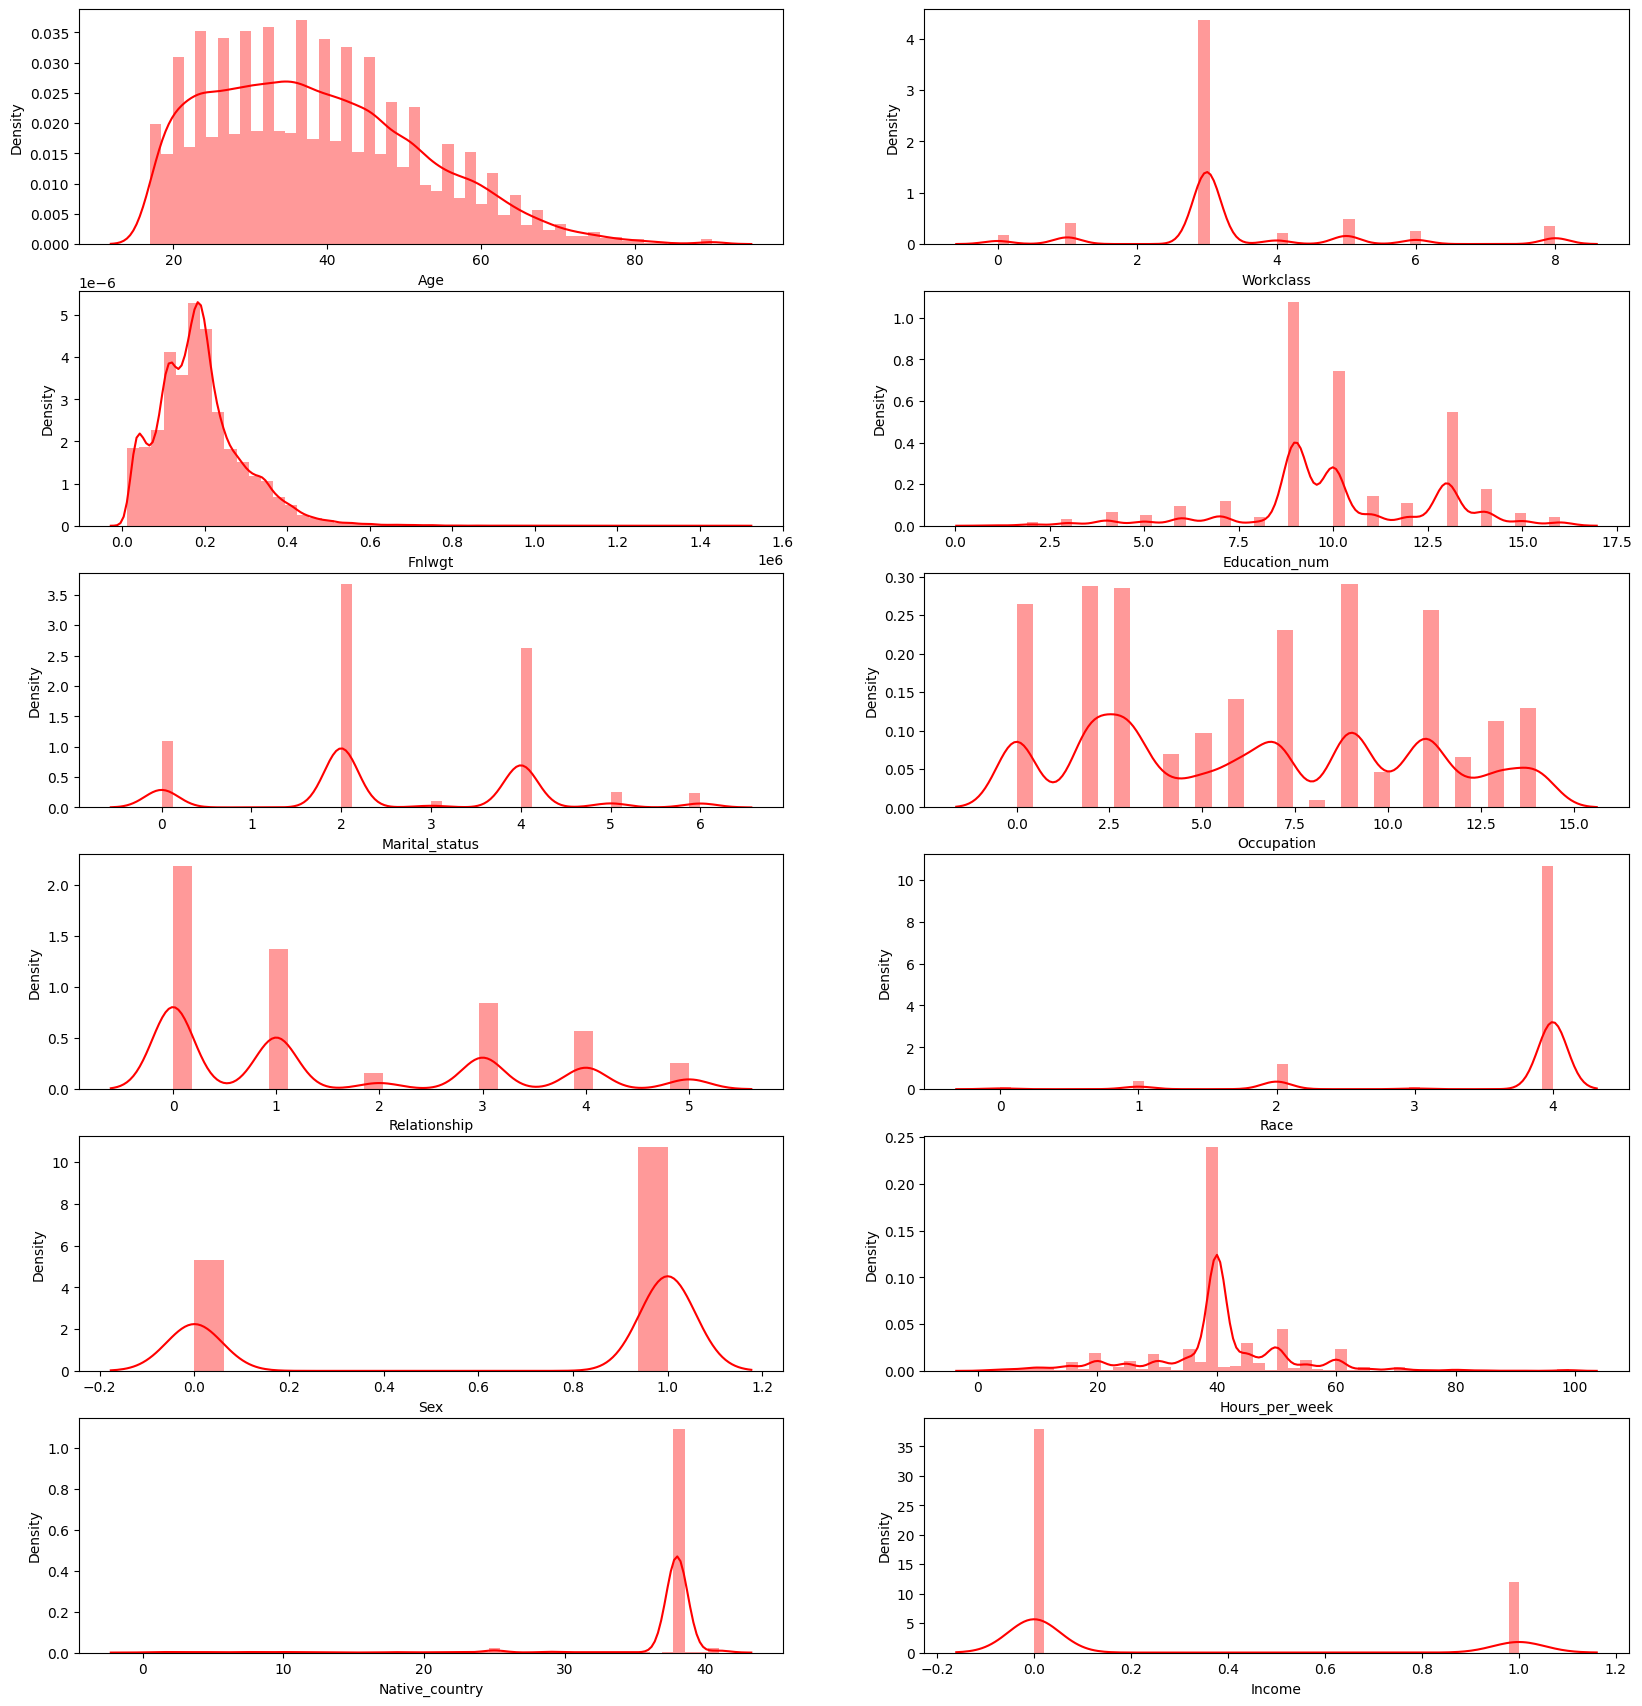

In [60]:
# checking for the disrtibution of data in all the  feature 
plt.figure(figsize=(20,25))

for col in enumerate(cidf):
    plt.subplot(7,2,col[0]+1)
    sns.distplot(cidf[col[1]],color='red')
plt.show()

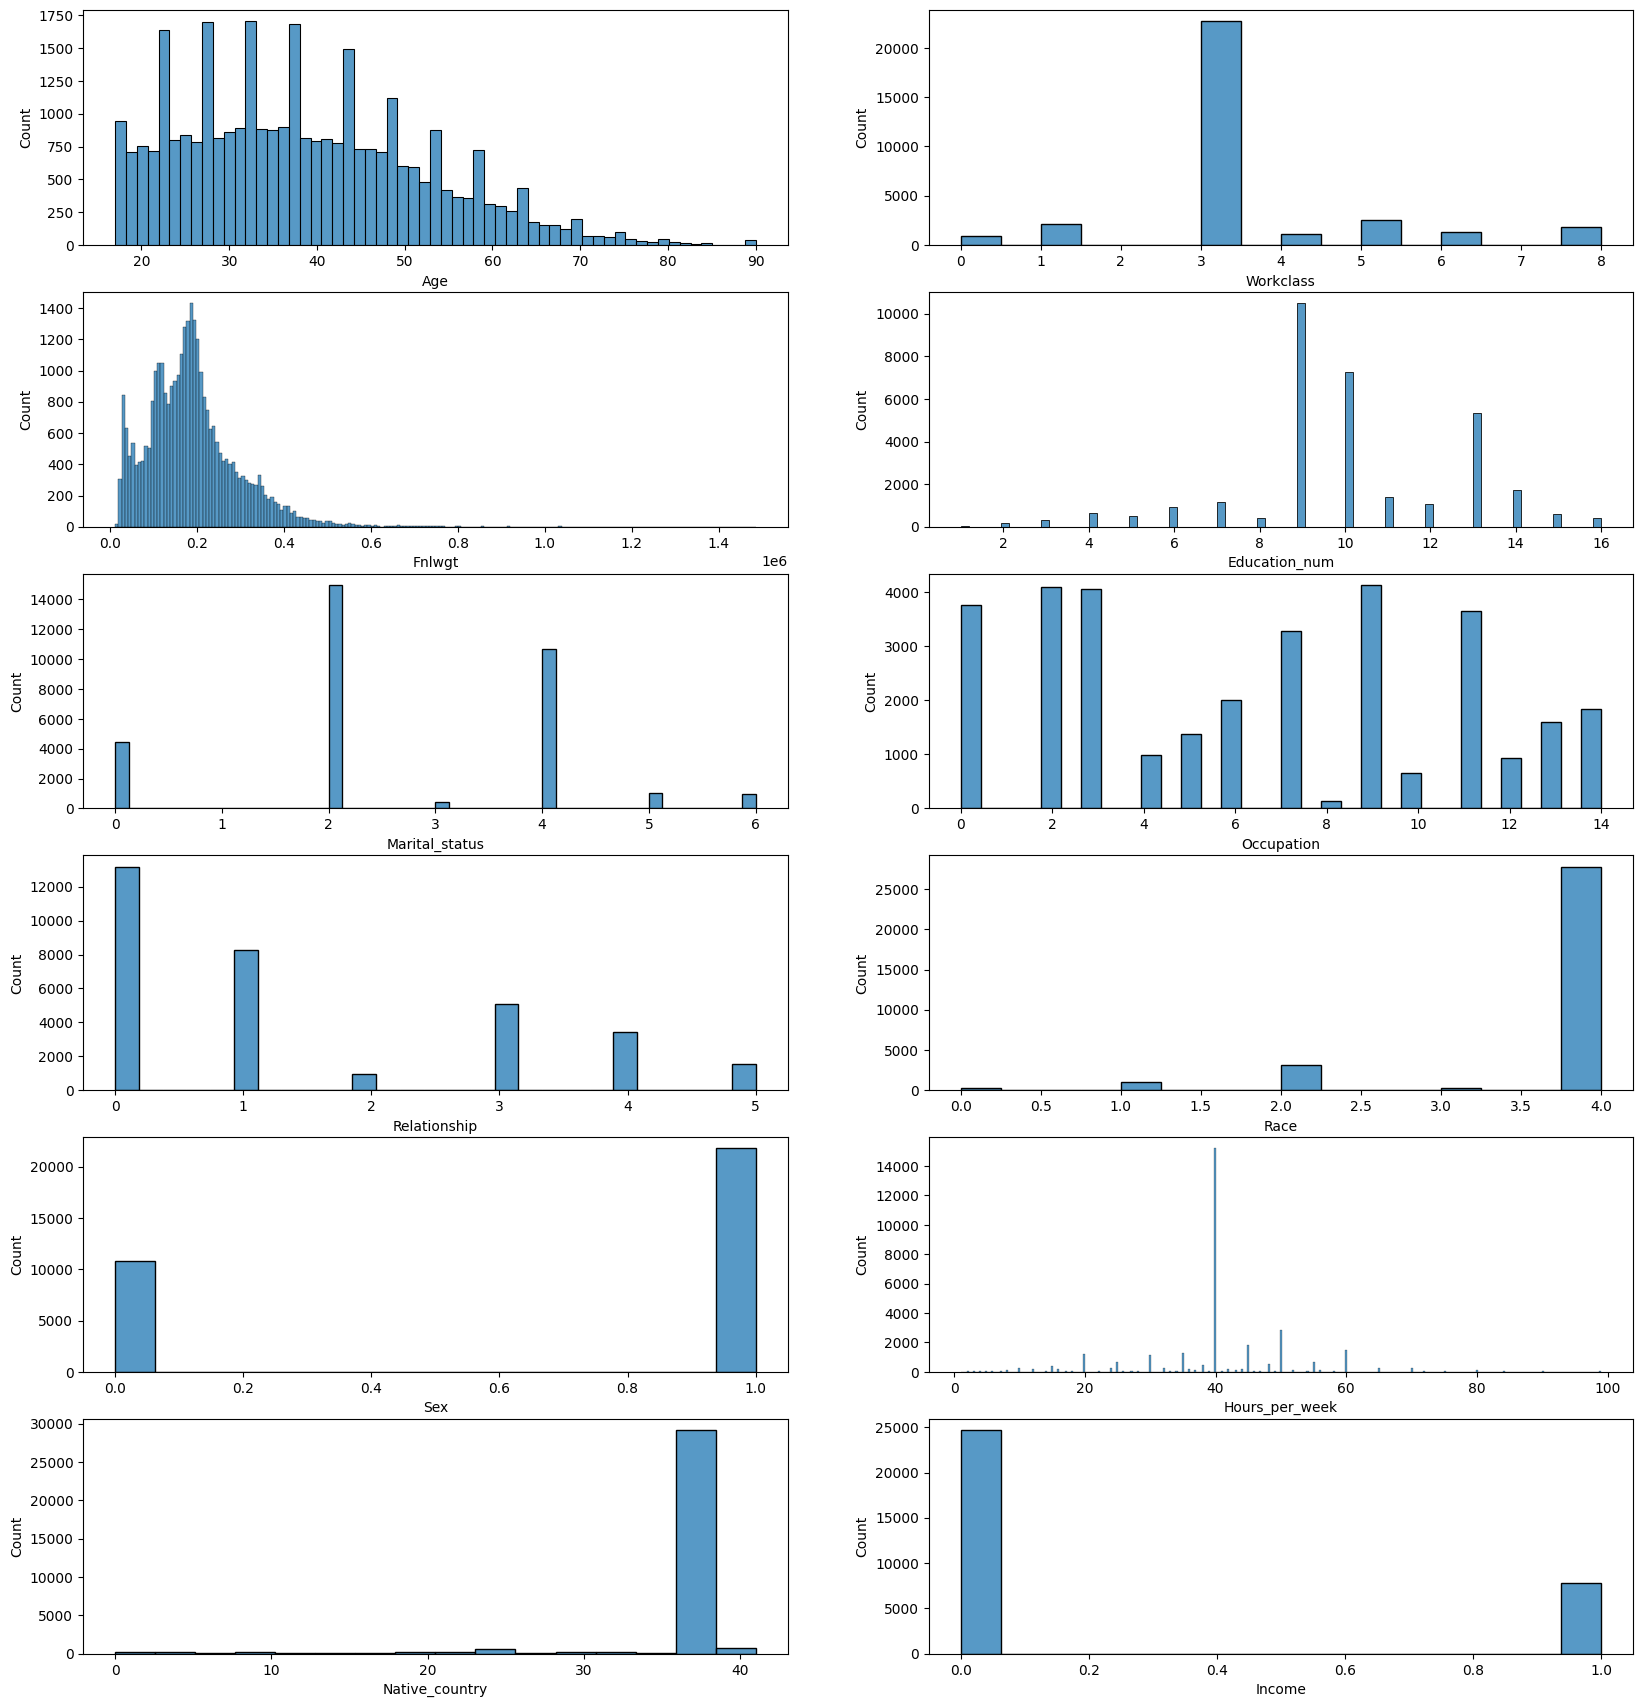

In [61]:
# checking for the disrtibution of data in all the  feature 
plt.figure(figsize=(20,25))

for col in enumerate(cidf):
    plt.subplot(7,2,col[0]+1)
    sns.histplot(cidf[col[1]])
plt.show()

                        #CHECKING FOR OUTLIERS IN ALL THE FEATURE 

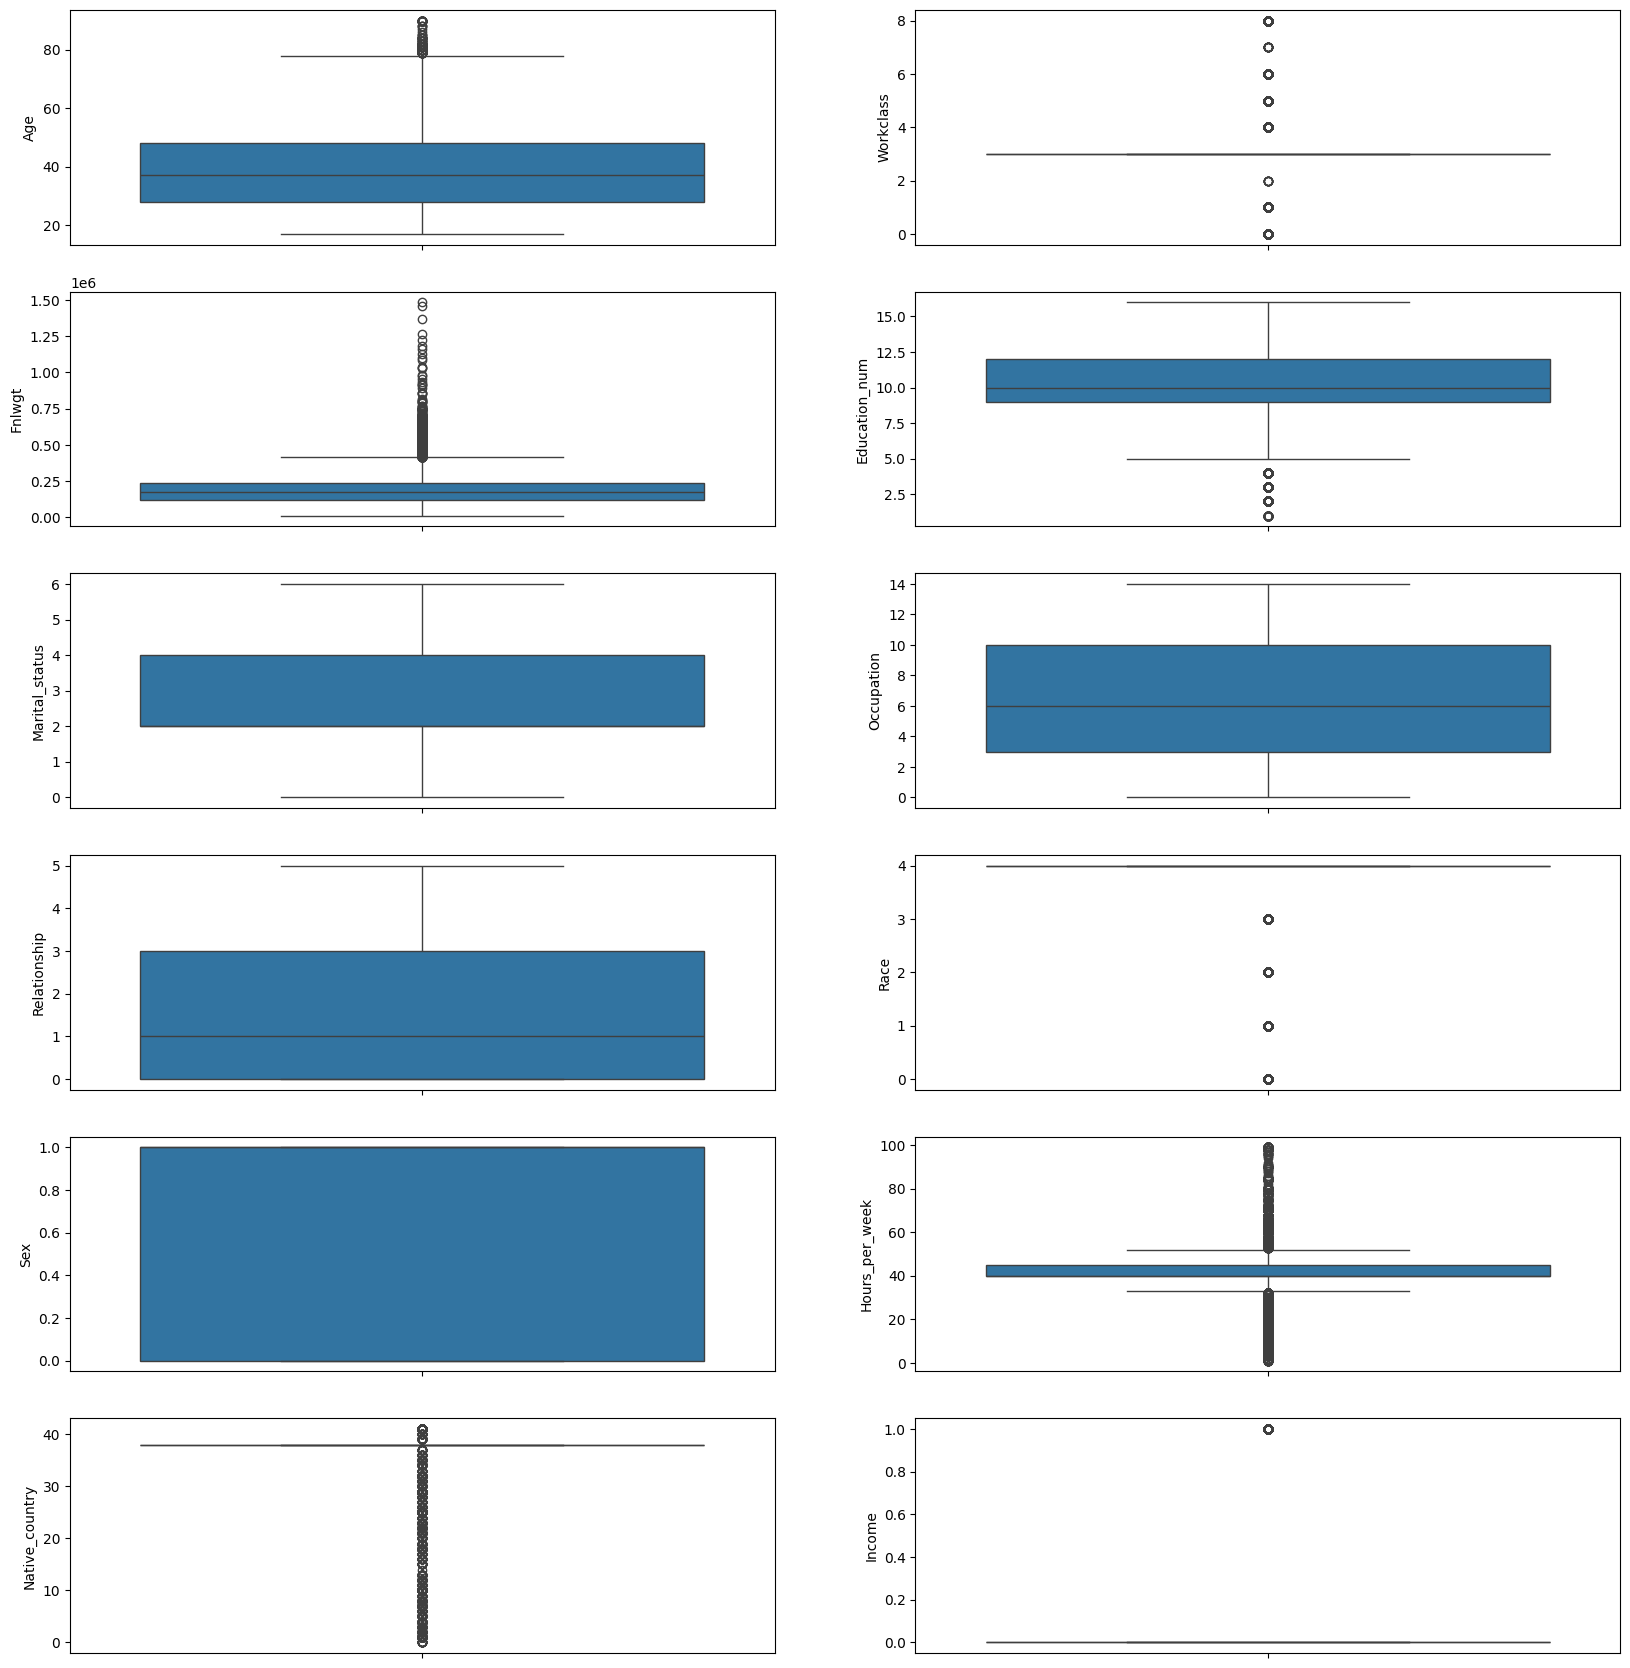

In [62]:
# checking for the disrtibution of data in all the  feature 
plt.figure(figsize=(20,25))

for col in enumerate(cidf):
    plt.subplot(7,2,col[0]+1)
    sns.boxplot(cidf[col[1]])
plt.show()

<Axes: >

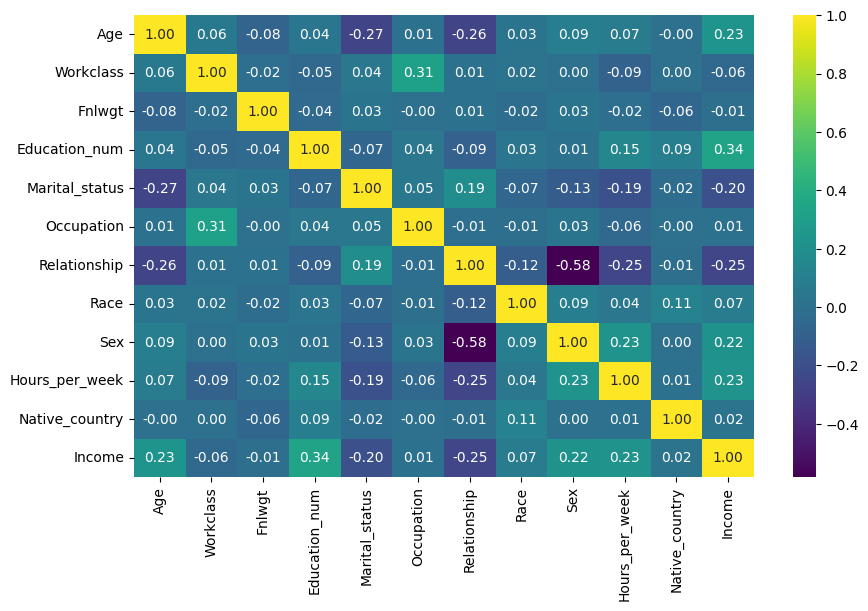

In [63]:
plt.figure(figsize=[10,6])
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

In [42]:
numerical

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

<Axes: xlabel='Income', ylabel='Fnlwgt'>

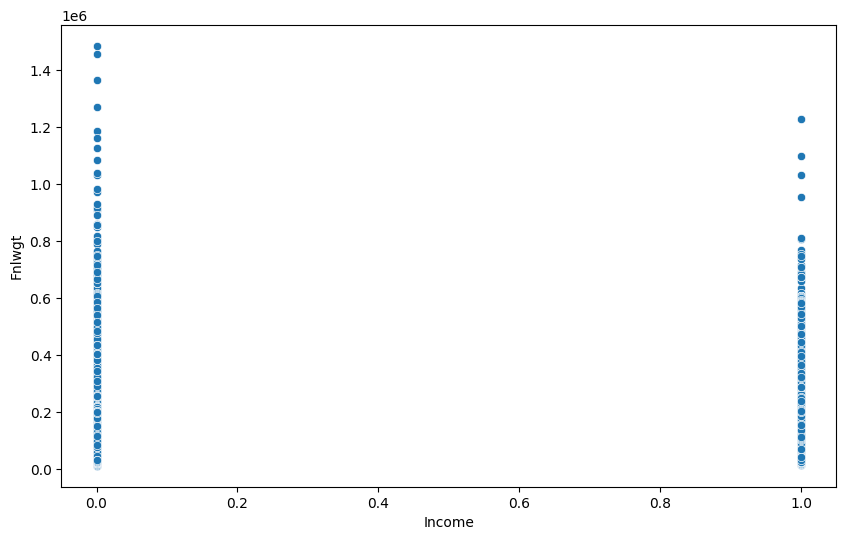

In [43]:
plt.figure(figsize=[10,6])
sns.scatterplot(x='Income',y='Fnlwgt',data=cidf)

In [ ]:
# Here from the above visalixation of scatterplot() we confirmed that there is positive linear relationship between  Hours_per_week and Income 
# with increase  in value of  one feature other will also increase

                            REMOVING OUTLIERS FROM THE FEATURE 
 Removing outliers from categorical feature  is not necessary it wil not affect distribution or central tendency unlike numerical feature 
No need to remove outliers from Target feature also 

In [44]:
from feature_engine.outliers import ArbitraryOutlierCapper
def remove_outliers(col):
    
    plt.figure(figsize=(20,10))  
#for i in avdf.columns:
    Q1=cidf[col].quantile(0.25)
   # Q2=avdf[i].quantile(0.5)
    Q3=cidf[col].quantile(0.75)
    iqr=Q3-Q1
    lowfence=Q1-1.5*iqr
    uppfence=Q3+1.5*iqr
    print(lowfence)
    print(uppfence)

    arb=ArbitraryOutlierCapper(min_capping_dict={col:lowfence},max_capping_dict={col:uppfence})
    cidf[[col]]=arb.fit_transform(cidf[[col]])
    plt.boxplot(cidf[col])


In [45]:
del numerical[3:5]

In [46]:
numerical

['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']

-2.0
78.0
-60911.125
415735.875
4.5
16.5
32.5
52.5


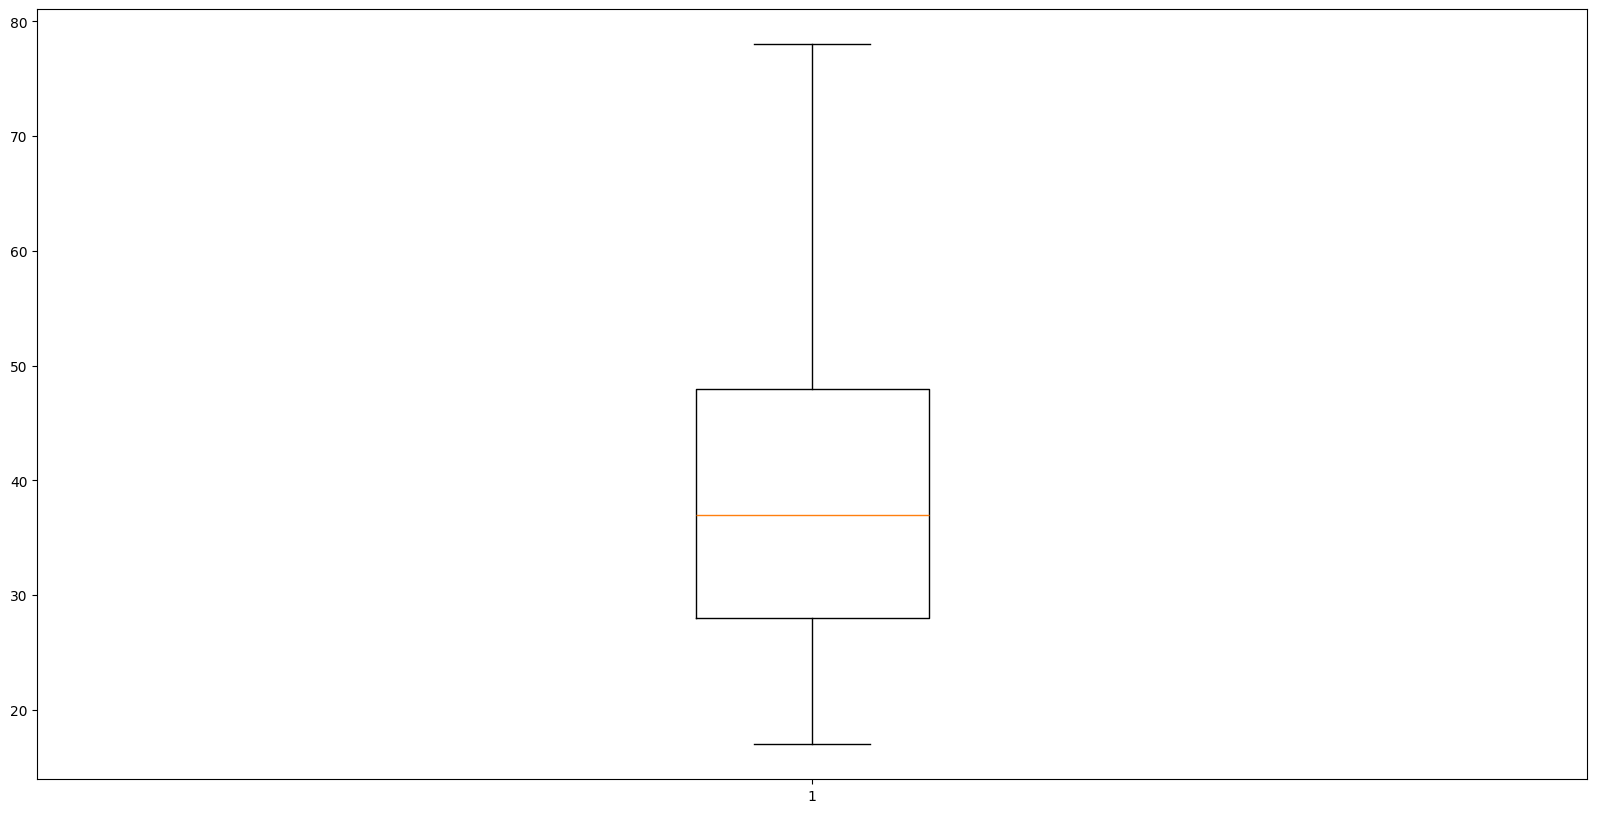

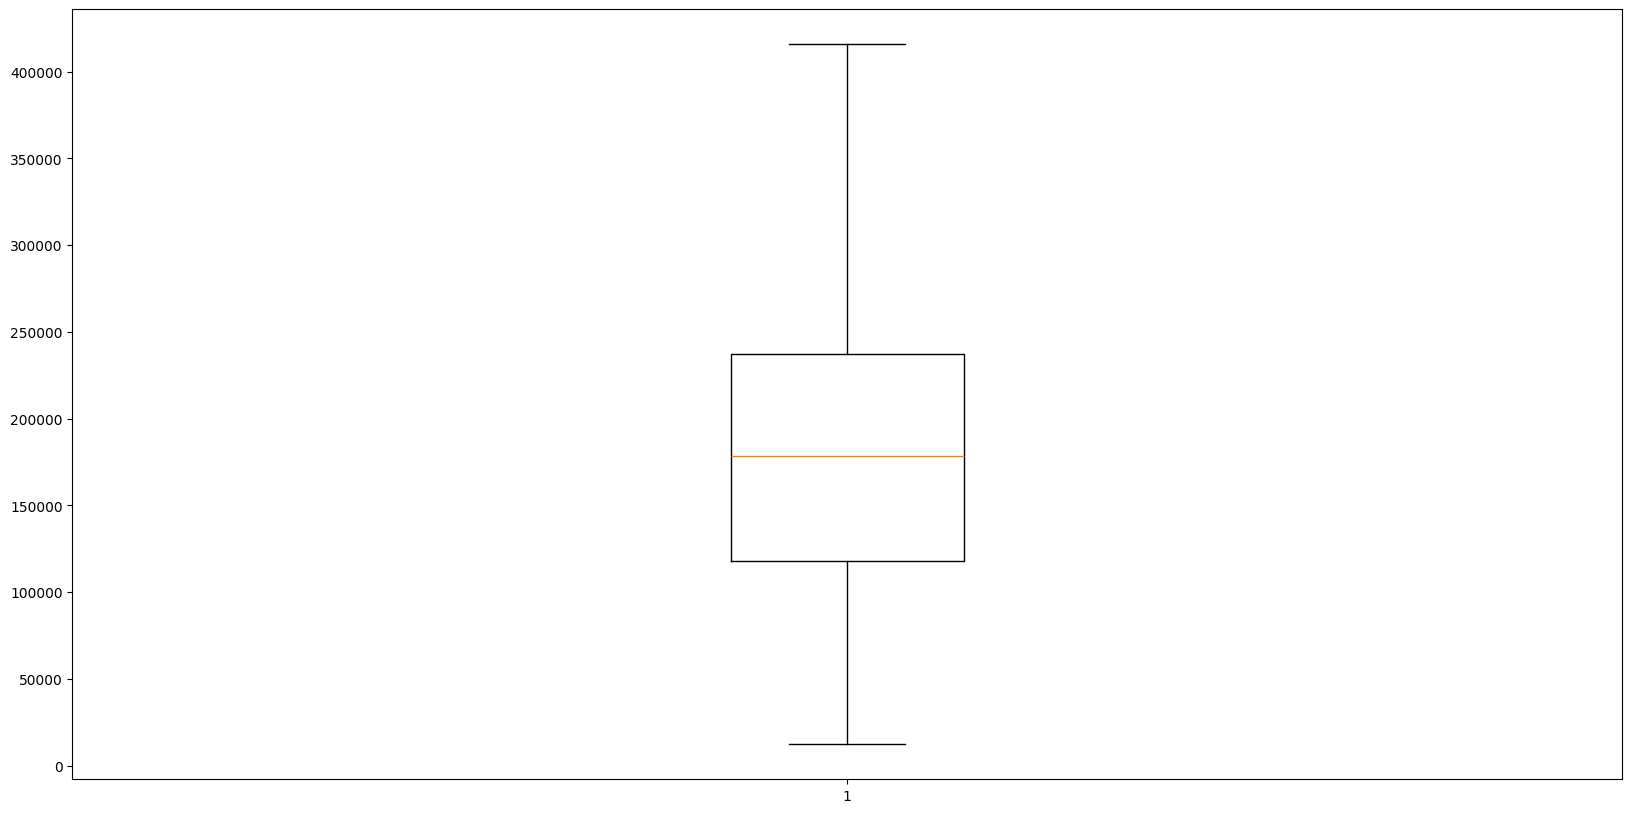

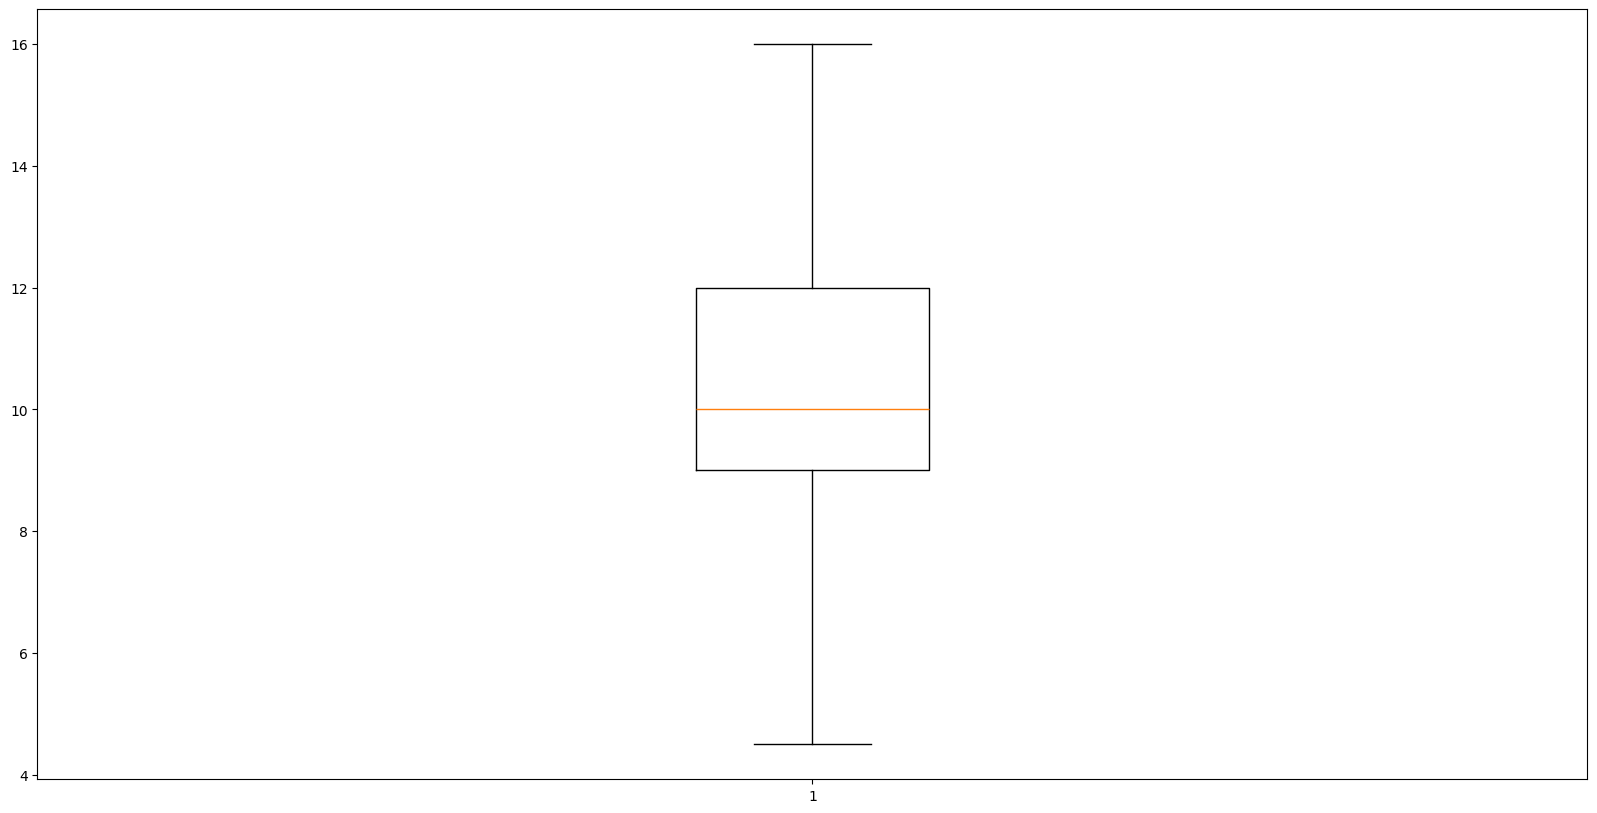

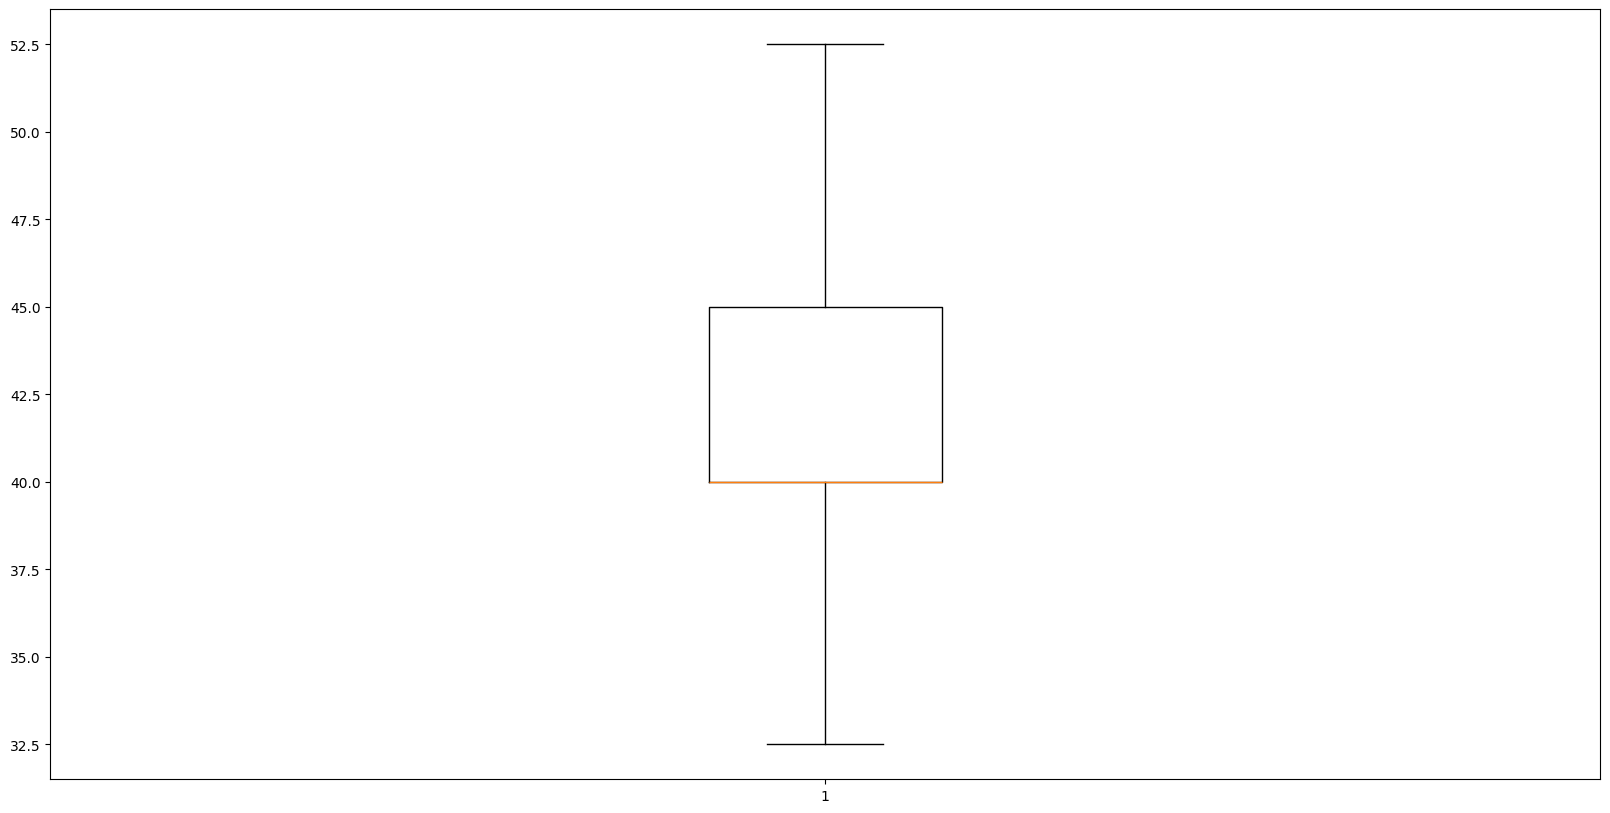

In [47]:
for col in numerical:
    remove_outliers(col)
    

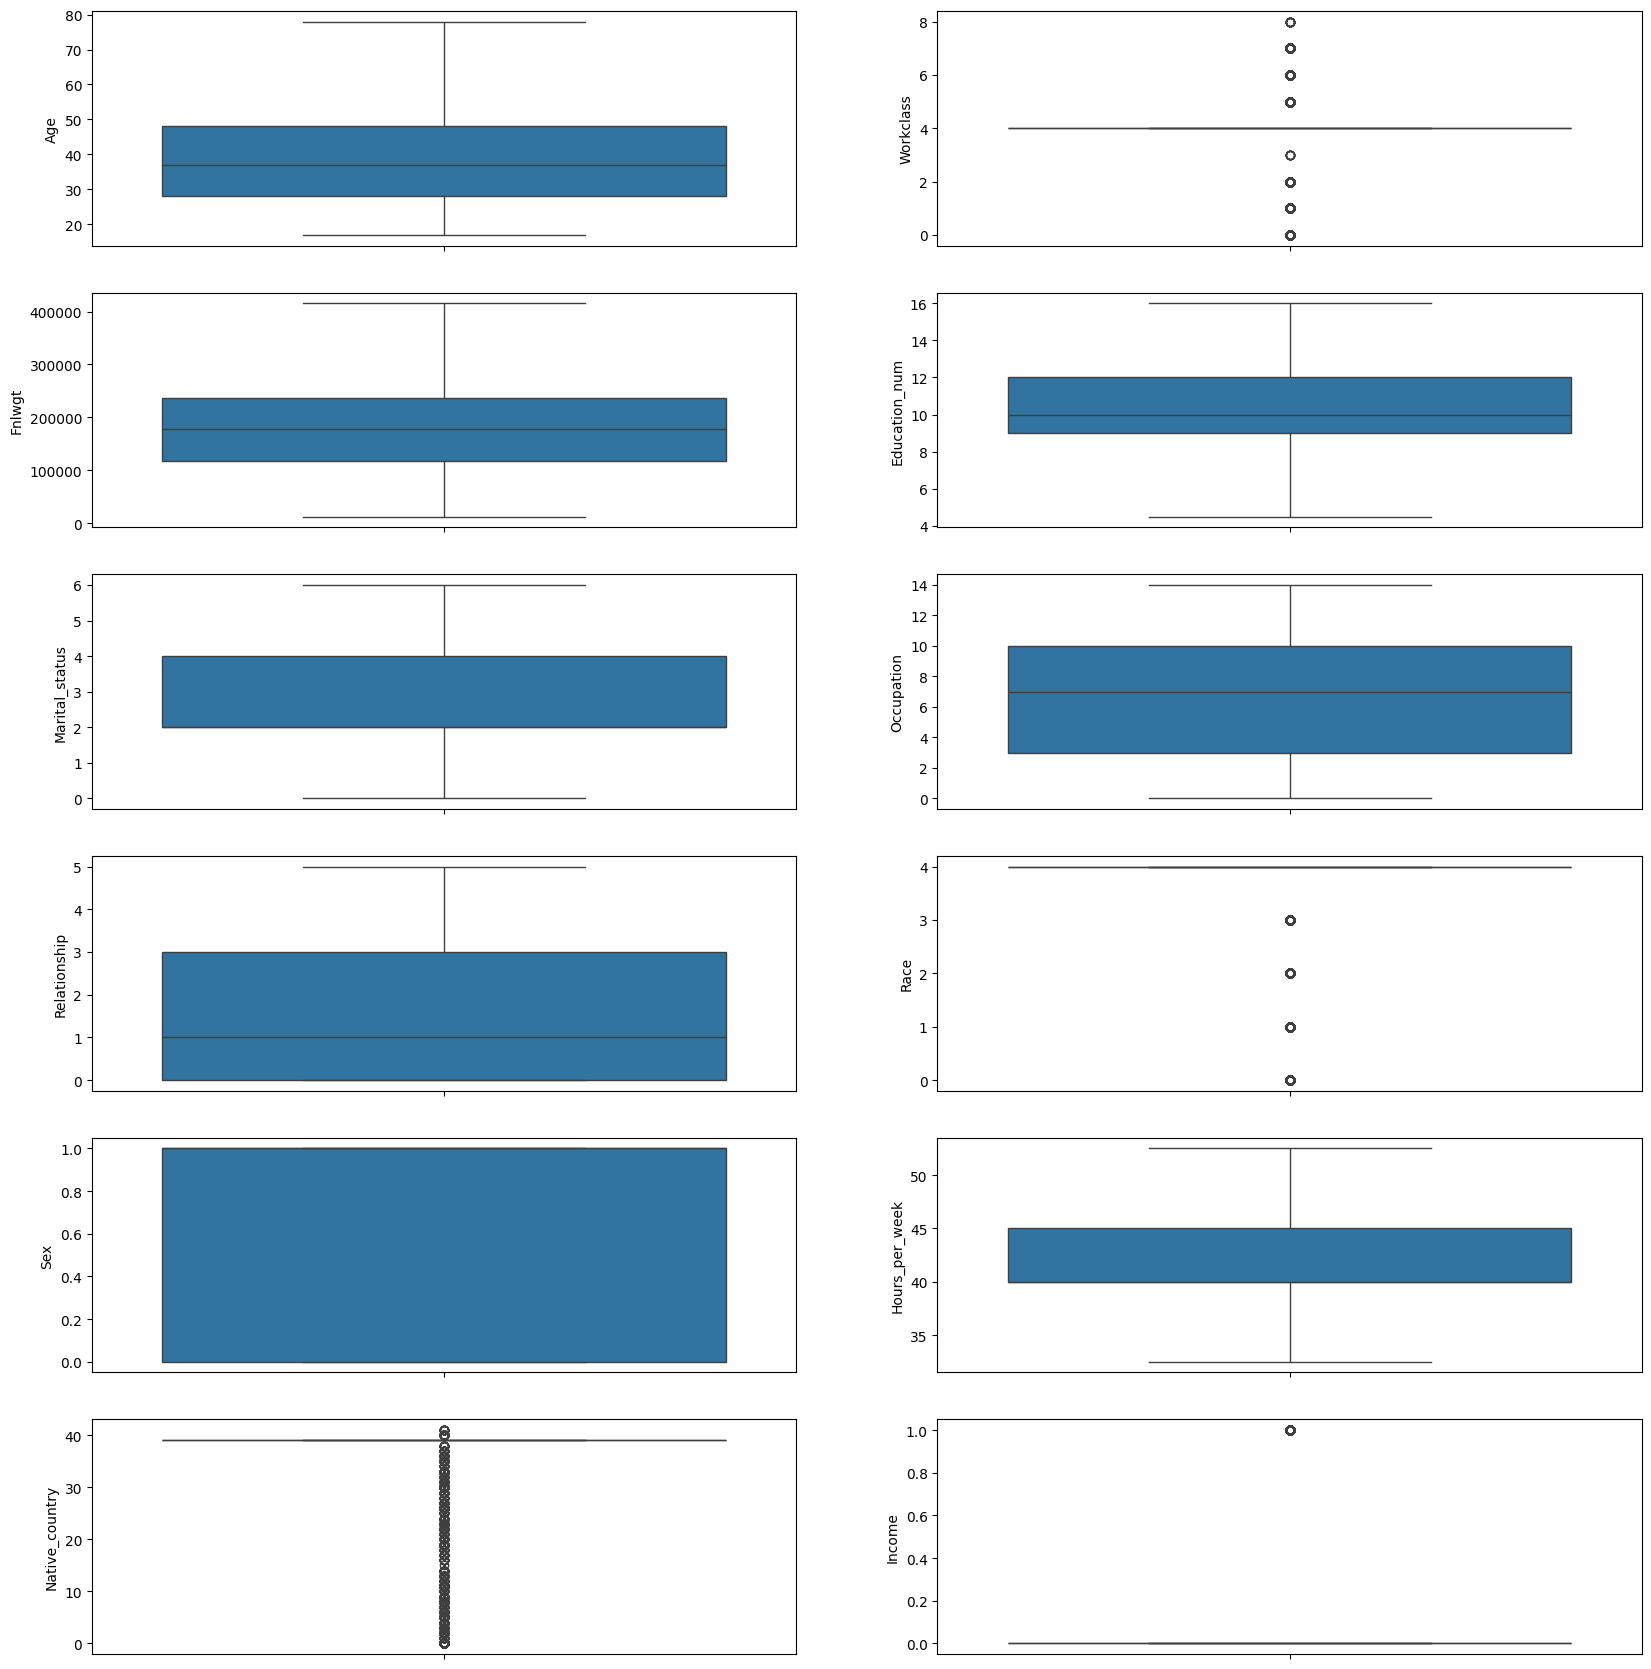

In [48]:
# checking for the disrtibution of data in all the  feature 
plt.figure(figsize=(20,25))

for col in enumerate(cidf):
    plt.subplot(7,2,col[0]+1)
    sns.boxplot(cidf[col[1]])
plt.show()

In [ ]:
# now we have removed outliers from the numerical feature

In [49]:
#Skewness for categorical column is not necessarily to remove 
cidf.skew()

Age               0.513431
Workclass        -0.751854
Fnlwgt            0.548103
Education_num    -0.033473
Marital_status   -0.012692
Occupation        0.114542
Relationship      0.786514
Race             -2.435283
Sex              -0.719400
Hours_per_week    0.438188
Native_country   -3.661060
Income            1.211640
dtype: float64

In [50]:
x=cidf.drop('Income',axis=1)

In [51]:
x

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,6,83311.0,13.0,2,4,0,4,1,32.5,39
1,38,4,215646.0,9.0,0,6,1,4,1,40.0,39
2,53,4,234721.0,7.0,2,6,0,2,1,40.0,39
3,28,4,338409.0,13.0,2,10,5,2,0,40.0,5
4,37,4,284582.0,14.0,2,4,5,4,0,40.0,39
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302.0,12.0,2,13,5,4,0,38.0,39
32556,40,4,154374.0,9.0,2,7,0,4,1,40.0,39
32557,58,4,151910.0,9.0,6,1,4,4,0,40.0,39
32558,22,4,201490.0,9.0,4,1,3,4,1,32.5,39


In [52]:
y=cidf.loc[:,'Income']

In [75]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32536, dtype: int32

In [53]:
y.value_counts()

Income
0    24697
1     7839
Name: count, dtype: int64

In [ ]:
                PERFORMING SCALING ON INDEPENDENT FEATURES

In [54]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)

In [55]:
x

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.843990,1.463505,-1.088328,1.168961,-0.405890,-0.608366,-0.900122,0.393692,0.703036,-1.406625,0.291340
1,-0.041302,0.090200,0.302977,-0.457463,-1.733664,-0.135486,-0.277868,0.393692,0.703036,-0.194475,0.291340
2,1.065313,0.090200,0.503522,-1.270675,-0.405890,-0.135486,-0.900122,-1.962450,0.703036,-0.194475,0.291340
3,-0.779045,0.090200,1.593647,1.168961,-0.405890,0.810273,2.211146,-1.962450,-1.422403,-0.194475,-4.056085
4,-0.115076,0.090200,1.027736,1.575567,-0.405890,-0.608366,2.211146,0.393692,-1.422403,-0.194475,0.291340
...,...,...,...,...,...,...,...,...,...,...,...
32531,-0.852820,0.090200,0.740928,0.762355,-0.405890,1.519592,2.211146,0.393692,-1.422403,-0.517715,0.291340
32532,0.106247,0.090200,-0.341207,-0.457463,-0.405890,0.100953,-0.900122,0.393692,0.703036,-0.194475,0.291340
32533,1.434185,0.090200,-0.367112,-0.457463,2.249657,-1.317685,1.588892,0.393692,-1.422403,-0.194475,0.291340
32534,-1.221691,0.090200,0.154148,-0.457463,0.921884,-1.317685,0.966639,0.393692,0.703036,-1.406625,0.291340


In [ ]:
                        APPLYING SMOTE TO TARGET FEATURE 

In [56]:
smt=SMOTE()
x1,y1=smt.fit_resample(x,y)



In [57]:
x1

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.843990,1.463505,-1.088328,1.168961,-0.405890,-0.608366,-0.900122,0.393692,0.703036,-1.406625,0.291340
1,-0.041302,0.090200,0.302977,-0.457463,-1.733664,-0.135486,-0.277868,0.393692,0.703036,-0.194475,0.291340
2,1.065313,0.090200,0.503522,-1.270675,-0.405890,-0.135486,-0.900122,-1.962450,0.703036,-0.194475,0.291340
3,-0.779045,0.090200,1.593647,1.168961,-0.405890,0.810273,2.211146,-1.962450,-1.422403,-0.194475,-4.056085
4,-0.115076,0.090200,1.027736,1.575567,-0.405890,-0.608366,2.211146,0.393692,-1.422403,-0.194475,0.291340
...,...,...,...,...,...,...,...,...,...,...,...
49389,0.759305,0.090200,-0.129281,1.284451,-0.405890,0.810273,-0.900122,0.393692,0.703036,0.613626,0.291340
49390,-0.384656,2.150157,-0.329067,-0.457463,-0.405890,1.596921,-0.900122,0.393692,0.703036,-0.194475,0.291340
49391,0.896886,0.090200,-0.210955,-0.050857,-0.405890,-0.844805,-0.900122,0.393692,0.703036,-0.194475,0.291340
49392,-0.211681,0.090200,-0.827733,0.939832,-0.405890,1.283152,-0.900122,0.393692,0.703036,0.613626,0.291340


In [58]:
y1.value_counts()

Income
0    24697
1    24697
Name: count, dtype: int64

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

,vif values,features
0,1.164494,Age
1,1.076009,Workclass
2,1.009943,Fnlwgt
3,1.097410,Education_num
4,1.137395,Marital_status
5,1.081021,Occupation
6,2.008968,Relationship
7,1.046982,Race
8,1.878252,Sex
9,1.210827,Hours_per_week


In [143]:
#x1.drop(['Capital_loss','Capital_gain'],axis=1,inplace=True)

In [144]:
x1

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.843990,1.025906,-1.088328,1.168961,-0.405890,-0.790625,-0.900122,0.393692,0.703036,-1.406625,0.251150
1,-0.041302,-0.237919,0.302977,-0.457463,-1.733664,-0.328636,-0.277868,0.393692,0.703036,-0.194475,0.251150
2,1.065313,-0.237919,0.503522,-1.270675,-0.405890,-0.328636,-0.900122,-1.962450,0.703036,-0.194475,0.251150
3,-0.779045,-0.237919,1.593647,1.168961,-0.405890,0.595341,2.211146,-1.962450,-1.422403,-0.194475,-5.340199
4,-0.115076,-0.237919,1.027736,1.575567,-0.405890,-0.790625,2.211146,0.393692,-1.422403,-0.194475,0.251150
...,...,...,...,...,...,...,...,...,...,...,...
49389,1.371653,2.921645,-0.593719,0.987345,-0.405890,1.750313,-0.900122,0.393692,0.703036,-1.406625,-5.833554
49390,0.358035,-0.237919,0.381737,-0.457463,-0.405890,-0.097642,-0.900122,0.393692,0.703036,0.613626,0.251150
49391,2.051454,-2.133657,-1.225592,-0.393116,-0.405890,1.288324,-0.900122,0.393692,0.703036,-0.386301,0.251150
49392,0.174691,0.393994,2.002620,2.170788,-0.405890,0.595341,-0.900122,0.393692,0.703036,1.046867,0.251150


In [ ]:
                                        MODEL BUILDING

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [61]:
maxac=0
maxRs=0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxRS=i
print('best accuracy',maxac,"at random state",maxRS)


best accuracy 0.8892637829813078 at random state 57


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRs)
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is',acc)

Accuracy is 0.8845401174168297


In [63]:
def classification_models(model,x_train,y_train,x_test,y_test):
     
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    c_matrix=confusion_matrix(y_test,pred)
    print(c_matrix)
    print(classification_report(y_test,pred))
    x_labels=['0','1']
    y_labels=['0','1']
    plt.figure(figsize=(15,10))
    sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
    plt.xlabel('predicted value')
    plt.ylabel('actual value')



0.8855523314663607
[[6492  916]
 [ 780 6631]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7408
           1       0.88      0.89      0.89      7411

    accuracy                           0.89     14819
   macro avg       0.89      0.89      0.89     14819
weighted avg       0.89      0.89      0.89     14819



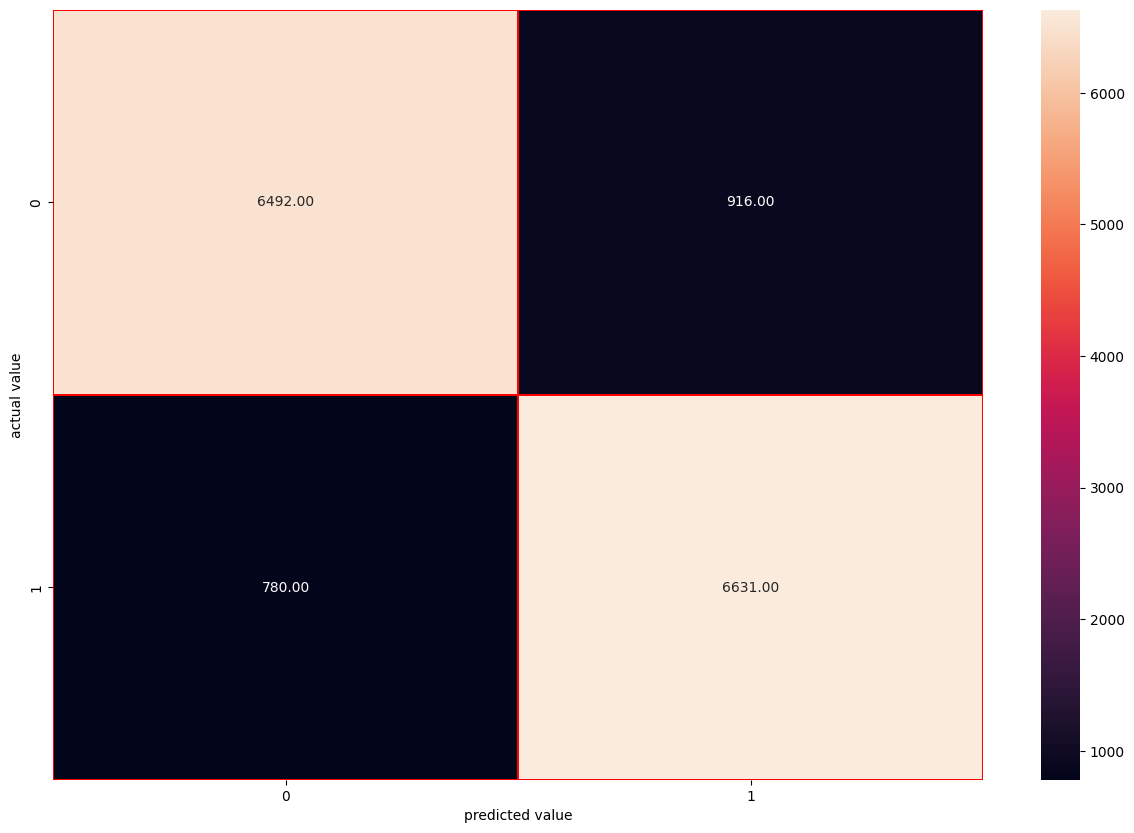

In [64]:
RFC=RandomForestClassifier()

classification_models(RFC,x_train,y_train,x_test,y_test)

0.7509278628787368
[[5486 1922]
 [1769 5642]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      7408
           1       0.75      0.76      0.75      7411

    accuracy                           0.75     14819
   macro avg       0.75      0.75      0.75     14819
weighted avg       0.75      0.75      0.75     14819



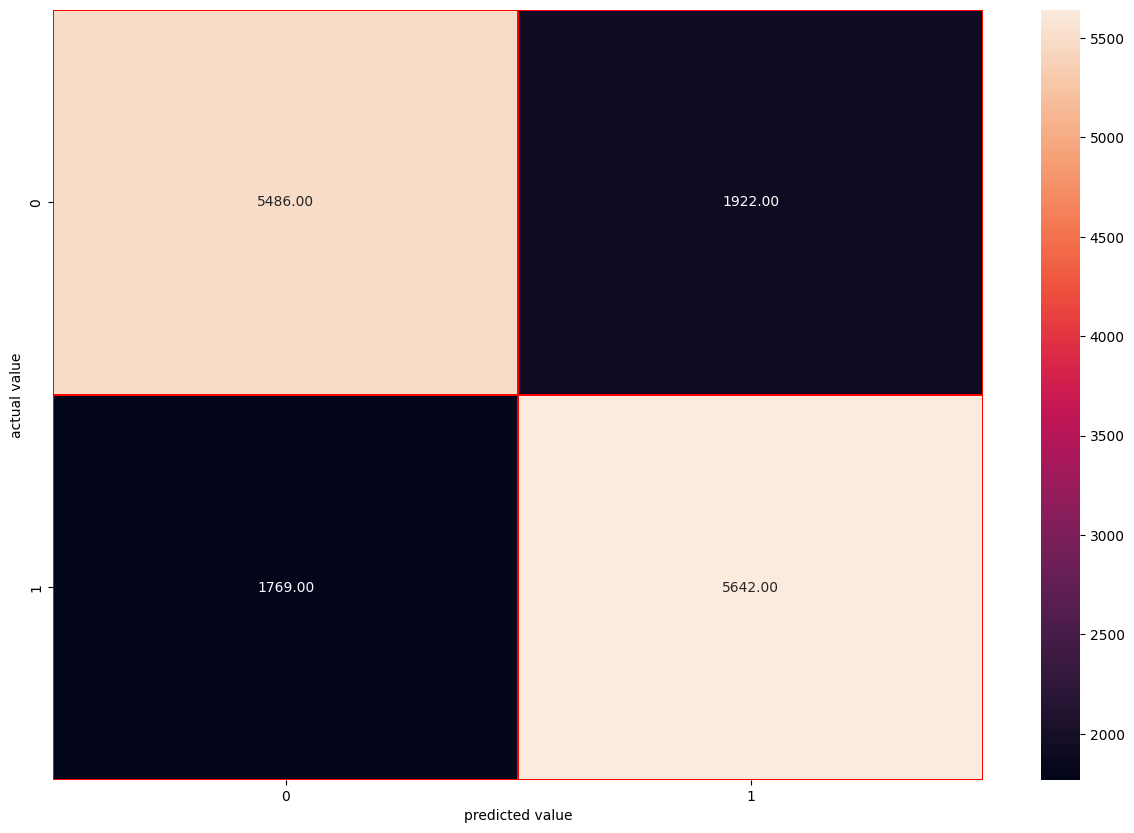

In [65]:
LR=LogisticRegression()
classification_models(LR,x_train,y_train,x_test,y_test)

0.822255212902355
[[5575 1833]
 [ 801 6610]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      7408
           1       0.78      0.89      0.83      7411

    accuracy                           0.82     14819
   macro avg       0.83      0.82      0.82     14819
weighted avg       0.83      0.82      0.82     14819



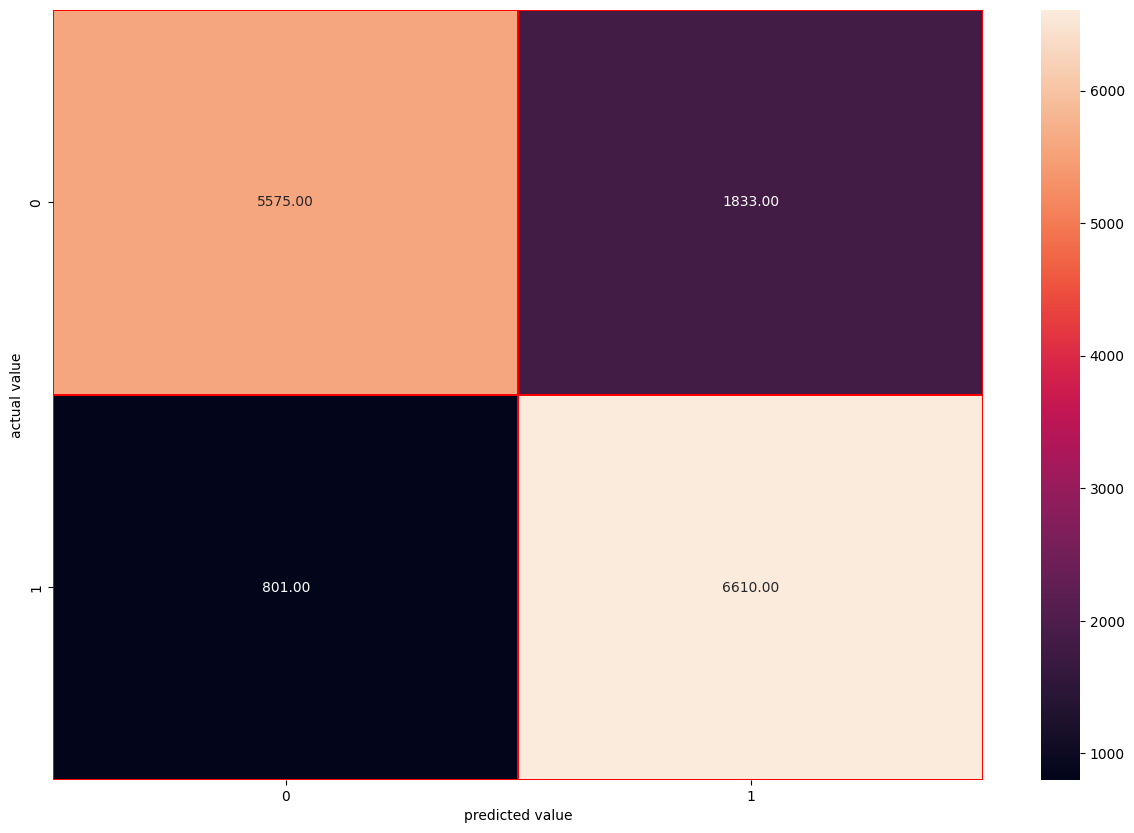

In [66]:
svc=SVC(kernel='rbf')
classification_models(svc,x_train,y_train,x_test ,y_test)


0.890478439840745
[[6478  930]
 [ 693 6718]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7408
           1       0.88      0.91      0.89      7411

    accuracy                           0.89     14819
   macro avg       0.89      0.89      0.89     14819
weighted avg       0.89      0.89      0.89     14819



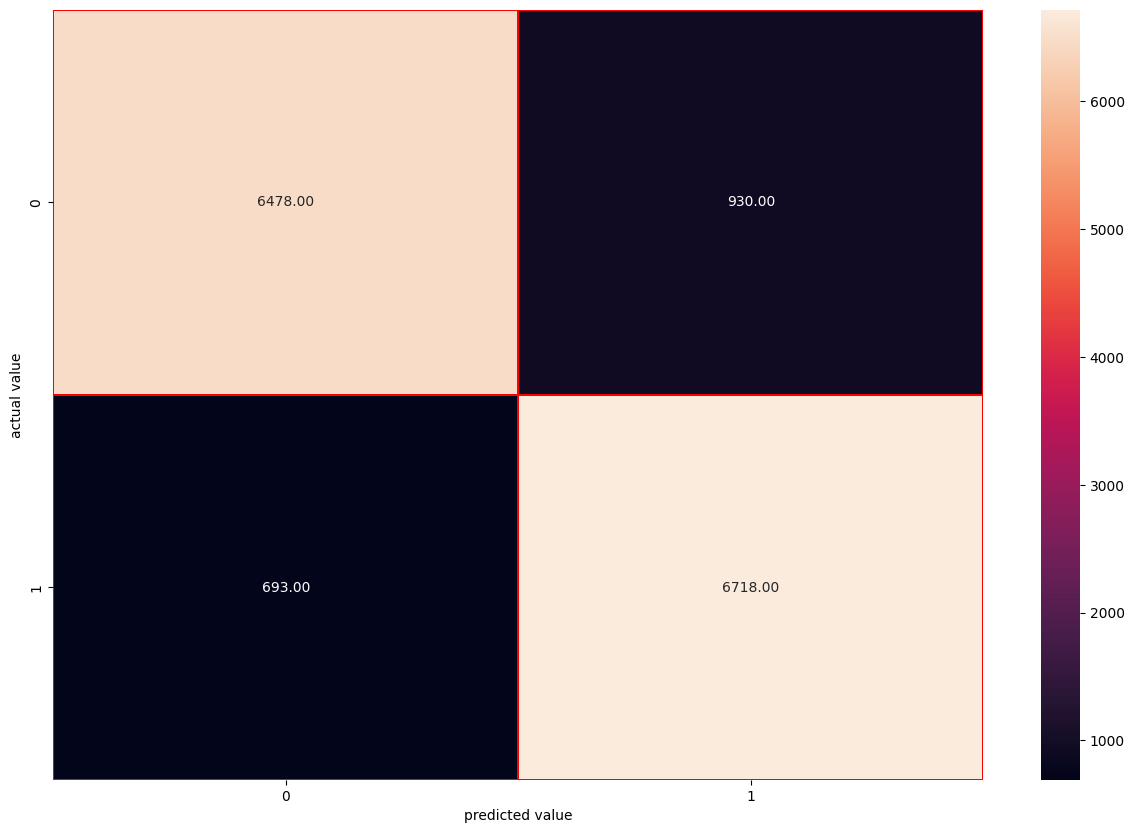

In [92]:
etc=ExtraTreesClassifier()
classification_models(etc,x_train,y_train,x_test,y_test)


In [ ]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

In [ ]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

0.8671975167015318
[[6526  882]
 [1086 6325]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      7408
           1       0.88      0.85      0.87      7411

    accuracy                           0.87     14819
   macro avg       0.87      0.87      0.87     14819
weighted avg       0.87      0.87      0.87     14819



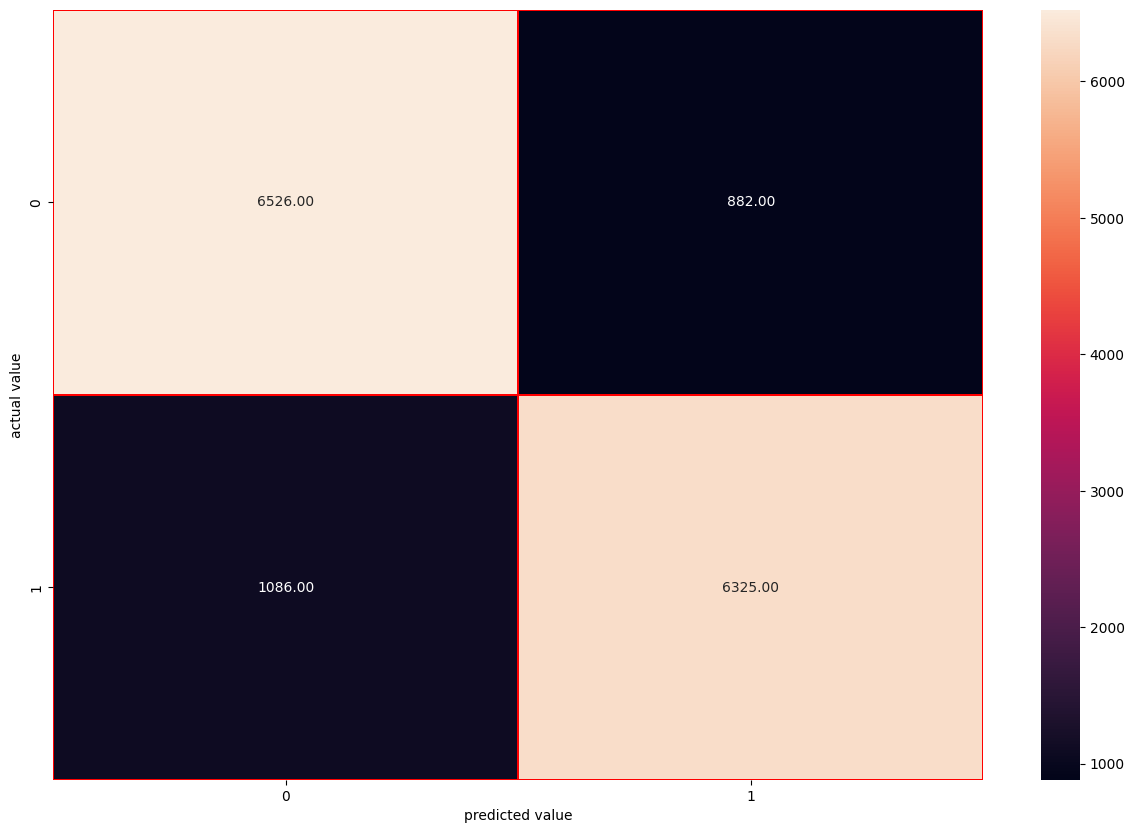

In [94]:
bgc=BaggingClassifier()
classification_models(bgc,x_train,y_train,x_test,y_test)

0.8407449895404548
[[6235 1173]
 [1187 6224]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      7408
           1       0.84      0.84      0.84      7411

    accuracy                           0.84     14819
   macro avg       0.84      0.84      0.84     14819
weighted avg       0.84      0.84      0.84     14819



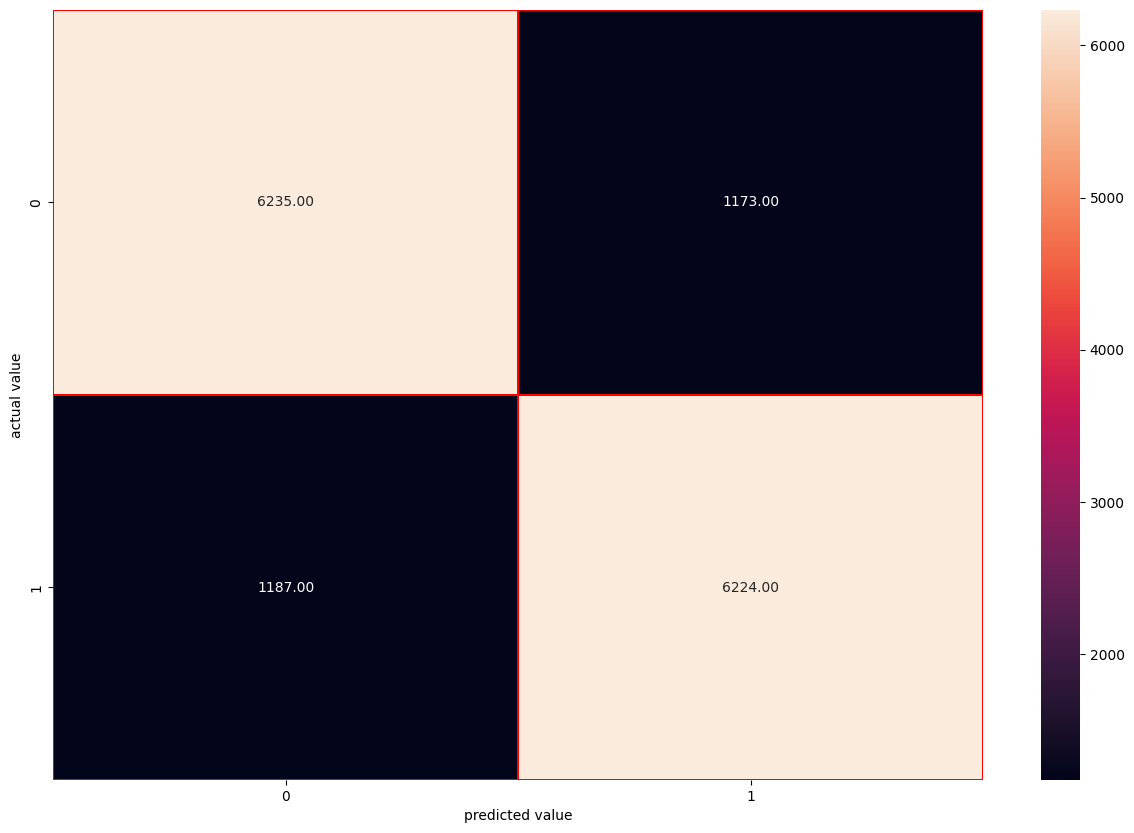

In [95]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)

In [96]:
def cross_validation(model,x1,y1,x_test):
    
    pred=model.predict(x_test)
    score=cross_val_score(model,x1,y1)
    print(score)
    print(score.mean())
    print('differnce between accuracy score and cross validation is',accuracy_score(y_test,pred)-score.mean())

In [97]:
models=[LR,RFC,etc,gbc,bgc,svc]

In [98]:
for model in models:
    print('for cross validation of {}'.format(model))
    
    cross_validation(model,x1,y1,x_test)
    print('#'*50)

for cross validation of LogisticRegression()
[0.7439012  0.75503593 0.75007592 0.75513716 0.75632719]
0.7520954818745165
differnce between accuracy score and cross validation is 0.0017340612795424537
##################################################
for cross validation of RandomForestClassifier()
[0.80645814 0.857273   0.917603   0.92276546 0.92012553]
0.8848450273414613
differnce between accuracy score and cross validation is 0.00016745663181627624
##################################################
for cross validation of ExtraTreesClassifier()
[0.84553092 0.8719506  0.91841279 0.92306914 0.92245394]
0.8962834791768002
differnce between accuracy score and cross validation is -0.00580503933605514
##################################################
for cross validation of GradientBoostingClassifier()
[0.79562709 0.83480109 0.87205183 0.87417755 0.87224134]
0.8497797801669076
differnce between accuracy score and cross validation is 0.0035166635877317276
#################################

In [ ]:
 '''From the above observation we conclude that RandomForestClassifierModel will be best performing model for our use case 
 as the difference between average cross validation score and accuracy score is very less '''
    
for cross validation of RandomForestClassifier()
[0.80645814 0.857273   0.917603   0.92276546 0.92012553]
0.8848450273414613
differnce between accuracy score and cross validation is 0.00016745663181627624

In [ ]:
                        HyperTunning parameter using GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [69]:
rfc=RandomForestClassifier()

In [70]:
grid_search=GridSearchCV(rfc,param_grid,cv=5,scoring='accuracy')

In [71]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [72]:
grid_search.best_params_

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}

In [75]:
final_model=RandomForestClassifier(n_estimators=300,max_depth=30,min_samples_split=2)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(y_test,pred))
    

0.8871043930089749


In [ ]:
# After Hyper parameter Tunning my model performance is 88%

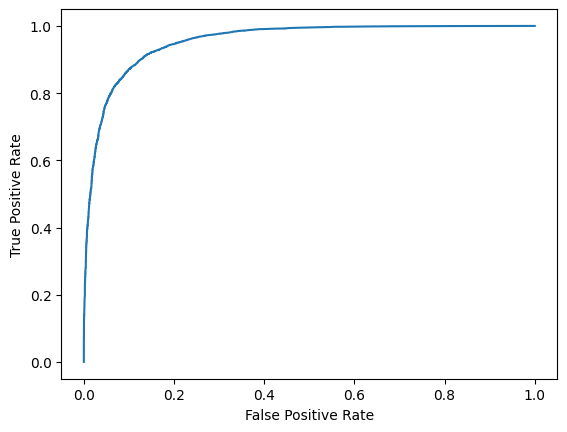

In [82]:
from sklearn import metrics
y_pred_proba = final_model.predict_proba(x_test)[:,1]
fpr, tpr,_= metrics.roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [84]:
import joblib


In [85]:
joblib.dump(final_model,'Census Income.pkl')

['Census Income.pkl']

In [87]:
prediction=final_model.predict(x_test)
df=pd.DataFrame()


In [88]:
orignal=np.array(y_test)

In [90]:
df['orignal']=orignal
df['predicted']=prediction

In [91]:
df

,orignal,predicted
0,0,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
14814,1,0
14815,1,0
14816,1,1
14817,0,0
